# **Import All Necessary Library **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

### **Load Data**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Jupyter Notebook Research Code/Sport/Germany_Bundesliga3815.csv')

In [ ]:
data

,fixture_id,referee,timezone,date,timestamp,first,second,venue_id,venue_name,city,...,Team2 Fouls,Team2 Corner Kicks,Team2 Offsides,Team2 Ball Possession,Team2 Yellow Cards,Team2 Red Cards,Team2 Goalkeeper Saves,Team2 Total passes,Team2 Passes accurate,Team2 Passes %
0,194567,"Bastian Dankert, Germany",UTC,2015-08-14T18:30:00+00:00,1439577000,1439577000,1439580600,NaN,Allianz Arena,Munich,...,12.0,NaN,NaN,24%,2.0,NaN,4.0,236,152,64%
1,194568,"Robert Hartmann, Germany",UTC,2015-08-15T13:30:00+00:00,1439645400,1439645400,1439649000,699.0,BayArena,Leverkusen,...,NaN,5.0,1.0,43%,NaN,NaN,7.0,300,173,58%
2,194569,"Tobias Welz, Germany",UTC,2015-08-15T13:30:00+00:00,1439645400,1439645400,1439649000,698.0,WWK Arena,Augsburg,...,NaN,4.0,1.0,52%,4.0,1.0,3.0,430,360,84%
3,194570,"Daniel Siebert, Germany",UTC,2015-08-15T13:30:00+00:00,1439645400,1439645400,1439649000,NaN,Weser-Stadion,Bremen,...,NaN,6.0,3.0,42%,2.0,NaN,2.0,321,234,73%
4,194571,"Guido Winkmann, Germany",UTC,2015-08-15T13:30:00+00:00,1439645400,1439645400,1439649000,717.0,Opel Arena,Mainz,...,NaN,2.0,5.0,43%,3.0,NaN,3.0,360,222,62%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,871295,F. Brych,UTC,2022-11-12T14:30:00+00:00,1668263400,1668263400,1668267000,698.0,WWK Arena,Augsburg,...,9.0,2.0,3.0,45%,1.0,NaN,5.0,369,217,59%
2280,871296,C. Dingert,UTC,2022-11-12T14:30:00+00:00,1668263400,1668263400,1668267000,694.0,Olympiastadion Berlin,Berlin,...,10.0,5.0,3.0,53%,1.0,NaN,6.0,396,304,77%
2281,871298,M. Jöllenbeck,UTC,2022-11-12T14:30:00+00:00,1668263400,1668263400,1668267000,755.0,wohninvest WESERSTADION,Bremen,...,8.0,4.0,1.0,52%,2.0,NaN,5.0,527,438,83%
2282,871297,F. Zwayer,UTC,2022-11-12T17:30:00+00:00,1668274200,1668274200,1668277800,741.0,VELTINS-Arena,Gelsenkirchen,...,4.0,5.0,1.0,70%,NaN,NaN,2.0,658,593,90%


# **Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixture_id              2284 non-null   int64  
 1   referee                 2283 non-null   object 
 2   timezone                2284 non-null   object 
 3   date                    2284 non-null   object 
 4   timestamp               2284 non-null   int64  
 5   first                   2284 non-null   int64  
 6   second                  2284 non-null   int64  
 7   venue_id                1703 non-null   float64
 8   venue_name              2282 non-null   object 
 9   city                    2281 non-null   object 
 10  long                    2284 non-null   object 
 11  short                   2284 non-null   object 
 12  elapsed                 2284 non-null   int64  
 13  league_id               2284 non-null   int64  
 14  league_name             2284 non-null   

In [ ]:
data.nunique().sort_values(ascending=False).head(30)

,0
fixture_id,2284
events,2284
team1substitutes,2284
players,2284
team2substitutes,2283
team1startXI,2212
team2startXI,2209
date,1243
timestamp,1243
first,1243


In [ ]:
data['venue_name'].unique()

array(['Allianz Arena', 'BayArena', 'WWK Arena', 'Weser-Stadion',
       'Opel Arena', 'Stadion am Böllenfalltor', 'Signal Iduna Park',
       'Volkswagen Arena', 'Mercedes-Benz Arena', 'Olympiastadion',
       'VELTINS-Arena', 'Commerzbank-Arena', 'RheinEnergieStadion',
       'HDI Arena', 'WIRSOL Rhein-Neckar-Arena', 'Volksparkstadion',
       'Audi Sportpark', 'Borussia-Park', 'Schwarzwald-Stadion',
       'Red Bull Arena', 'Merkur Spielarena', 'Max-Morlock-Stadion',
       'Allianz Arena (München)', 'An der Alten Försterei',
       'Signal-Iduna-Park', 'VOLKSWAGEN ARENA', 'wohninvest WESERSTADION',
       'Stadion im BORUSSIA-PARK', 'Stadion An der Alten Försterei',
       'PreZero Arena', 'Merkur Spiel-Arena', 'OPEL ARENA',
       'Benteler-Arena', 'Olympiastadion Berlin', nan,
       'Deutsche Bank Park', 'Mercedes-Benz-Arena', 'SchücoArena',
       'Holstein-Stadion', 'MEWA ARENA', 'Dreisamstadion',
       'Vonovia Ruhrstadion', 'Sportpark Ronhof Thomas Sommer',
       'Europa-P

In [ ]:
data['Team1 Corner Kicks'].unique()

array([ 7., 13.,  5.,  6.,  3.,  2., nan,  1.,  8.,  4.,  9., 10., 11.,
       12., 14., 18., 17., 15., 19., 16.])

In [ ]:
data['long'].unique()

array(['Match Finished'], dtype=object)

In [ ]:
data['short'].unique()

array(['FT'], dtype=object)

In [ ]:

data.describe()


,elapsed,league_id,season,home_goals,away_goals,halftimehome,halftimeaway,fulltimehome,fulltimeaway,Team1 Shots on Goal,...,Team2 Shots insidebox,Team2 Shots outsidebox,Team2 Fouls,Team2 Corner Kicks,Team2 Offsides,Team2 Yellow Cards,Team2 Red Cards,Team2 Goalkeeper Saves,Team2 Total passes,Team2 Passes accurate
count,2284.0,2284.0,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2241.000000,...,2279.000000,2219.000000,1991.000000,2222.000000,1890.000000,2011.000000,184.000000,2153.000000,2284.000000,2284.000000
mean,90.0,78.0,2018.239930,1.678196,1.333625,0.739492,0.586690,1.678196,1.333625,5.131191,...,7.454585,4.458315,12.966851,4.557156,2.414286,2.266037,1.021739,3.550859,439.260946,341.813485
std,0.0,0.0,2.155631,1.387080,1.233880,0.866973,0.781363,1.387080,1.233880,2.618396,...,3.624437,2.374049,4.085260,2.471471,1.451640,1.151825,0.146228,1.996824,122.342354,124.730101
min,90.0,78.0,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,171.000000,79.000000
25%,90.0,78.0,2016.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,5.000000,3.000000,10.000000,3.000000,1.000000,1.000000,1.000000,2.000000,353.000000,251.000000
50%,90.0,78.0,2018.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,...,7.000000,4.000000,13.000000,4.000000,2.000000,2.000000,1.000000,3.000000,423.000000,323.000000
75%,90.0,78.0,2020.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,7.000000,...,10.000000,6.000000,16.000000,6.000000,3.000000,3.000000,1.000000,5.000000,508.250000,412.000000
max,90.0,78.0,2022.000000,8.000000,7.000000,6.000000,6.000000,8.000000,7.000000,20.000000,...,24.000000,17.000000,28.000000,15.000000,10.000000,7.000000,2.000000,19.000000,927.000000,837.000000


In [ ]:
data.shape


(2284, 45)



```
 ```
# **Data Cleaning**


In [ ]:
data.isnull().sum().sort_values(ascending=False).head(40)

,0
penaltyaway,2284
penaltyhome,2284
extratimeaway,2284
extratimehome,2284
Team1 Red Cards,2157
Team2 Red Cards,2100
venue_id,581
home_winner,558
away_winner,558
Team1 Yellow Cards,412


In [ ]:
# Dropping the specified columns from your DataFrame
columns_to_drop = ['penaltyaway', 'penaltyhome', 'extratimeaway', 'extratimehome','fixture_id', 'referee', 'timezone', 'timestamp',
    'venue_id', 'events', 'players','first', 'second', 'long', 'short','country', 'round', 'home_id', 'away_id', 'Team1 Passes %', 'Team2 Passes %',
    'Team1 Ball Possession', 'Team2 Ball Possession',
    'team1startXI', 'team2startXI', 'team1substitutes', 'team2substitutes',
    'team1coach', 'team2coach', 'team1formation', 'team2formation']
data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to verify the changes
data.head()



,date,venue_name,city,elapsed,league_id,league_name,season,home_name,home_winner,away_name,...,Team2 Shots insidebox,Team2 Shots outsidebox,Team2 Fouls,Team2 Corner Kicks,Team2 Offsides,Team2 Yellow Cards,Team2 Red Cards,Team2 Goalkeeper Saves,Team2 Total passes,Team2 Passes accurate
0,2015-08-14T18:30:00+00:00,Allianz Arena,Munich,90,78,Bundesliga,2015,Bayern Munich,True,Hamburger SV,...,2.0,3.0,12.0,NaN,NaN,2.0,NaN,4.0,236,152
1,2015-08-15T13:30:00+00:00,BayArena,Leverkusen,90,78,Bundesliga,2015,Bayer Leverkusen,True,1899 Hoffenheim,...,4.0,2.0,NaN,5.0,1.0,NaN,NaN,7.0,300,173
2,2015-08-15T13:30:00+00:00,WWK Arena,Augsburg,90,78,Bundesliga,2015,FC Augsburg,False,Hertha Berlin,...,6.0,5.0,NaN,4.0,1.0,4.0,1.0,3.0,430,360
3,2015-08-15T13:30:00+00:00,Weser-Stadion,Bremen,90,78,Bundesliga,2015,Werder Bremen,False,FC Schalke 04,...,9.0,8.0,NaN,6.0,3.0,2.0,NaN,2.0,321,234
4,2015-08-15T13:30:00+00:00,Opel Arena,Mainz,90,78,Bundesliga,2015,FSV Mainz 05,False,FC Ingolstadt 04,...,6.0,8.0,NaN,2.0,5.0,3.0,NaN,3.0,360,222


In [ ]:
data.isnull().sum().sort_values(ascending=False).head(40)

,0
Team1 Red Cards,2157
Team2 Red Cards,2100
away_winner,558
home_winner,558
Team1 Yellow Cards,412
Team2 Offsides,394
Team1 Offsides,339
Team2 Fouls,293
Team1 Fouls,293
Team2 Yellow Cards,273


In [ ]:
data

,date,venue_name,city,elapsed,league_id,league_name,season,home_name,home_winner,away_name,...,Team2 Shots insidebox,Team2 Shots outsidebox,Team2 Fouls,Team2 Corner Kicks,Team2 Offsides,Team2 Yellow Cards,Team2 Red Cards,Team2 Goalkeeper Saves,Team2 Total passes,Team2 Passes accurate
0,2015-08-14T18:30:00+00:00,Allianz Arena,Munich,90,78,Bundesliga,2015,Bayern Munich,True,Hamburger SV,...,2.0,3.0,12.0,NaN,NaN,2.0,NaN,4.0,236,152
1,2015-08-15T13:30:00+00:00,BayArena,Leverkusen,90,78,Bundesliga,2015,Bayer Leverkusen,True,1899 Hoffenheim,...,4.0,2.0,NaN,5.0,1.0,NaN,NaN,7.0,300,173
2,2015-08-15T13:30:00+00:00,WWK Arena,Augsburg,90,78,Bundesliga,2015,FC Augsburg,False,Hertha Berlin,...,6.0,5.0,NaN,4.0,1.0,4.0,1.0,3.0,430,360
3,2015-08-15T13:30:00+00:00,Weser-Stadion,Bremen,90,78,Bundesliga,2015,Werder Bremen,False,FC Schalke 04,...,9.0,8.0,NaN,6.0,3.0,2.0,NaN,2.0,321,234
4,2015-08-15T13:30:00+00:00,Opel Arena,Mainz,90,78,Bundesliga,2015,FSV Mainz 05,False,FC Ingolstadt 04,...,6.0,8.0,NaN,2.0,5.0,3.0,NaN,3.0,360,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2022-11-12T14:30:00+00:00,WWK Arena,Augsburg,90,78,Bundesliga,2022,FC Augsburg,False,VfL BOCHUM,...,7.0,4.0,9.0,2.0,3.0,1.0,NaN,5.0,369,217
2280,2022-11-12T14:30:00+00:00,Olympiastadion Berlin,Berlin,90,78,Bundesliga,2022,Hertha Berlin,True,FC Koln,...,7.0,3.0,10.0,5.0,3.0,1.0,NaN,6.0,396,304
2281,2022-11-12T14:30:00+00:00,wohninvest WESERSTADION,Bremen,90,78,Bundesliga,2022,Werder Bremen,False,RB Leipzig,...,9.0,5.0,8.0,4.0,1.0,2.0,NaN,5.0,527,438
2282,2022-11-12T17:30:00+00:00,VELTINS-Arena,Gelsenkirchen,90,78,Bundesliga,2022,FC Schalke 04,False,Bayern Munich,...,14.0,7.0,4.0,5.0,1.0,NaN,NaN,2.0,658,593


In [ ]:
# Categorical columns with mode imputation
data['city'].fillna(data['city'].mode()[0], inplace=True)
data['venue_name'].fillna(data['venue_name'].mode()[0], inplace=True)
data['away_winner'].fillna(data['away_winner'].mode()[0], inplace=True)
data['home_winner'].fillna(data['home_winner'].mode()[0], inplace=True)

# Numeric columns with median imputation
numeric_columns = [
    'Team1 Yellow Cards', 'Team2 Offsides', 'Team1 Offsides', 'Team2 Fouls',
    'Team1 Fouls', 'Team2 Yellow Cards',
    'Team1 Blocked Shots', 'Team2 Goalkeeper Saves', 'Team2 Shots on Goal',
    'Team2 Shots outsidebox', 'Team2 Corner Kicks', 'Team1 Corner Kicks',
    'Team1 Shots on Goal', 'Team2 Shots off Goal', 'Team1 Shots outsidebox',
    'Team1 Shots off Goal', 'Team2 Shots insidebox', 'Team1 Shots insidebox'
]

for column in numeric_columns:
    data[column].fillna(data[column].median(), inplace=True)

# For columns with few missing values, consider domain-specific or manual approaches
# Example for low missing data columns
data['Team1 Total Shots'].fillna(data['Team1 Total Shots'].median(), inplace=True)


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['Team2 Blocked Shots', 'Team1 Goalkeeper Saves']] = imputer.fit_transform(data[['Team2 Blocked Shots', 'Team1 Goalkeeper Saves']])


In [ ]:
data.isnull().sum().sort_values(ascending=False).head(40)

,0
Team1 Red Cards,2157
Team2 Red Cards,2100
date,0
Team2 Total Shots,0
Team1 Offsides,0
Team1 Yellow Cards,0
Team1 Goalkeeper Saves,0
Team1 Total passes,0
Team1 Passes accurate,0
Team2 Shots on Goal,0


In [ ]:
# List of columns that may be less relevant based on your goals
columns_to_drop = ['Team1 Red Cards','Team2 Red Cards'

]

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Verify the remaining c

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(40)

,0
date,0
Team2 Total Shots,0
Team1 Corner Kicks,0
Team1 Offsides,0
Team1 Yellow Cards,0
Team1 Goalkeeper Saves,0
Team1 Total passes,0
Team1 Passes accurate,0
Team2 Shots on Goal,0
Team2 Shots off Goal,0


In [ ]:
data

,date,venue_name,city,elapsed,league_id,league_name,season,home_name,home_winner,away_name,...,Team2 Blocked Shots,Team2 Shots insidebox,Team2 Shots outsidebox,Team2 Fouls,Team2 Corner Kicks,Team2 Offsides,Team2 Yellow Cards,Team2 Goalkeeper Saves,Team2 Total passes,Team2 Passes accurate
0,2015-08-14T18:30:00+00:00,Allianz Arena,Munich,90,78,Bundesliga,2015,Bayern Munich,True,Hamburger SV,...,1.0,2.0,3.0,12.0,4.0,2.0,2.0,4.0,236,152
1,2015-08-15T13:30:00+00:00,BayArena,Leverkusen,90,78,Bundesliga,2015,Bayer Leverkusen,True,1899 Hoffenheim,...,1.0,4.0,2.0,13.0,5.0,1.0,2.0,7.0,300,173
2,2015-08-15T13:30:00+00:00,WWK Arena,Augsburg,90,78,Bundesliga,2015,FC Augsburg,False,Hertha Berlin,...,1.0,6.0,5.0,13.0,4.0,1.0,4.0,3.0,430,360
3,2015-08-15T13:30:00+00:00,Weser-Stadion,Bremen,90,78,Bundesliga,2015,Werder Bremen,False,FC Schalke 04,...,4.0,9.0,8.0,13.0,6.0,3.0,2.0,2.0,321,234
4,2015-08-15T13:30:00+00:00,Opel Arena,Mainz,90,78,Bundesliga,2015,FSV Mainz 05,False,FC Ingolstadt 04,...,1.0,6.0,8.0,13.0,2.0,5.0,3.0,3.0,360,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2022-11-12T14:30:00+00:00,WWK Arena,Augsburg,90,78,Bundesliga,2022,FC Augsburg,False,VfL BOCHUM,...,2.0,7.0,4.0,9.0,2.0,3.0,1.0,5.0,369,217
2280,2022-11-12T14:30:00+00:00,Olympiastadion Berlin,Berlin,90,78,Bundesliga,2022,Hertha Berlin,True,FC Koln,...,4.0,7.0,3.0,10.0,5.0,3.0,1.0,6.0,396,304
2281,2022-11-12T14:30:00+00:00,wohninvest WESERSTADION,Bremen,90,78,Bundesliga,2022,Werder Bremen,False,RB Leipzig,...,3.0,9.0,5.0,8.0,4.0,1.0,2.0,5.0,527,438
2282,2022-11-12T17:30:00+00:00,VELTINS-Arena,Gelsenkirchen,90,78,Bundesliga,2022,FC Schalke 04,False,Bayern Munich,...,5.0,14.0,7.0,4.0,5.0,1.0,2.0,2.0,658,593


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2284 non-null   object 
 1   venue_name              2284 non-null   object 
 2   city                    2284 non-null   object 
 3   elapsed                 2284 non-null   int64  
 4   league_id               2284 non-null   int64  
 5   league_name             2284 non-null   object 
 6   season                  2284 non-null   int64  
 7   home_name               2284 non-null   object 
 8   home_winner             2284 non-null   bool   
 9   away_name               2284 non-null   object 
 10  away_winner             2284 non-null   bool   
 11  home_goals              2284 non-null   int64  
 12  away_goals              2284 non-null   int64  
 13  halftimehome            2284 non-null   int64  
 14  halftimeaway            2284 non-null   

In [ ]:
data['date'] = pd.to_datetime(data['date'])


# ** Visualize Data**

In [ ]:
# Calculate total possible goals by summing home_goals and away_goals
total_possible_goals = data['home_goals'].sum() + data['away_goals'].sum()

print(f"Total possible goals: {total_possible_goals}")


Total possible goals: 6879


In [ ]:
# Determine the winner of each match
data['match_winner'] = data.apply(lambda row: 'Home' if row['home_goals'] > row['away_goals'] else ('Away' if row['home_goals'] < row['away_goals'] else 'Draw'), axis=1)

# Count the number of matches won by each side
winner_counts = data['match_winner'].value_counts()

print("Match Winner Counts:")
print(winner_counts)

Match Winner Counts:
match_winner
Home    1019
Away     707
Draw     558
Name: count, dtype: int64


<ipython-input-105-2c910a7c681e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='away_goals', y='away_name', data=away_goals_by_team, palette='viridis')


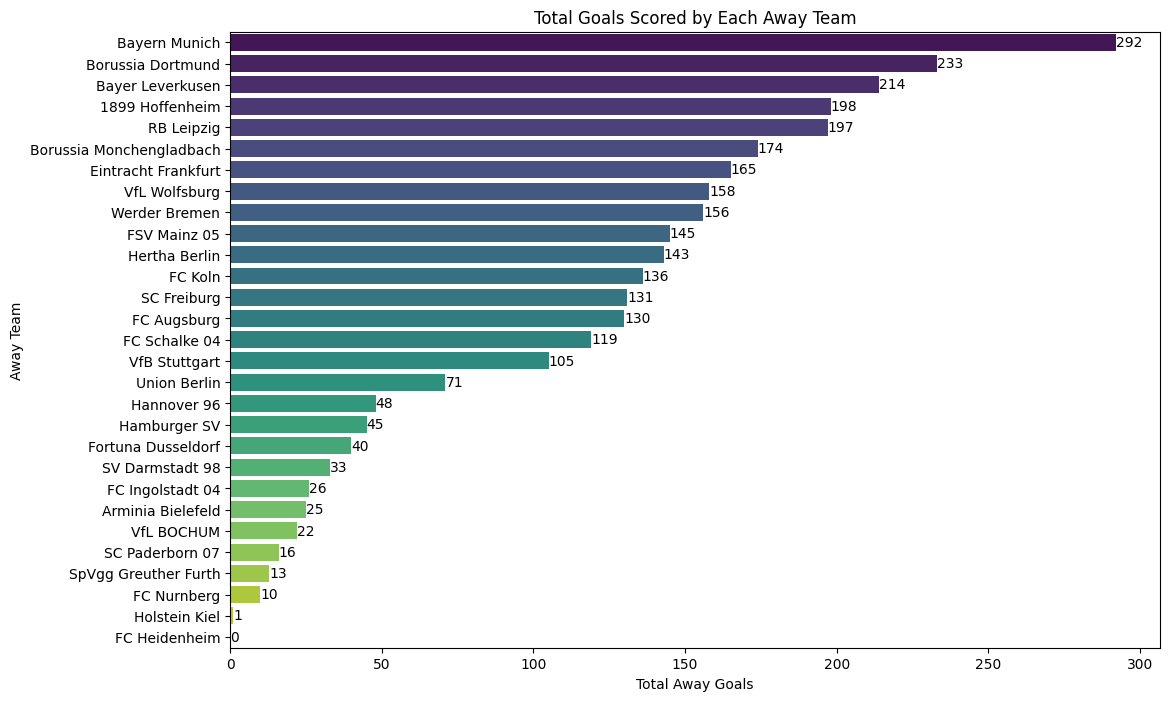

In [ ]:
# Group the data by away_name and sum the away_goals for each team
away_goals_by_team = data.groupby('away_name')['away_goals'].sum().reset_index()

# Sort the teams by the total number of goals scored
away_goals_by_team = away_goals_by_team.sort_values(by='away_goals', ascending=False)

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='away_goals', y='away_name', data=away_goals_by_team, palette='viridis')

plt.xlabel('Total Away Goals')
plt.ylabel('Away Team')
plt.title('Total Goals Scored by Each Away Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


<ipython-input-106-1d1515cd955a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='home_goals', y='home_name', data=home_goals_by_team, palette='viridis')


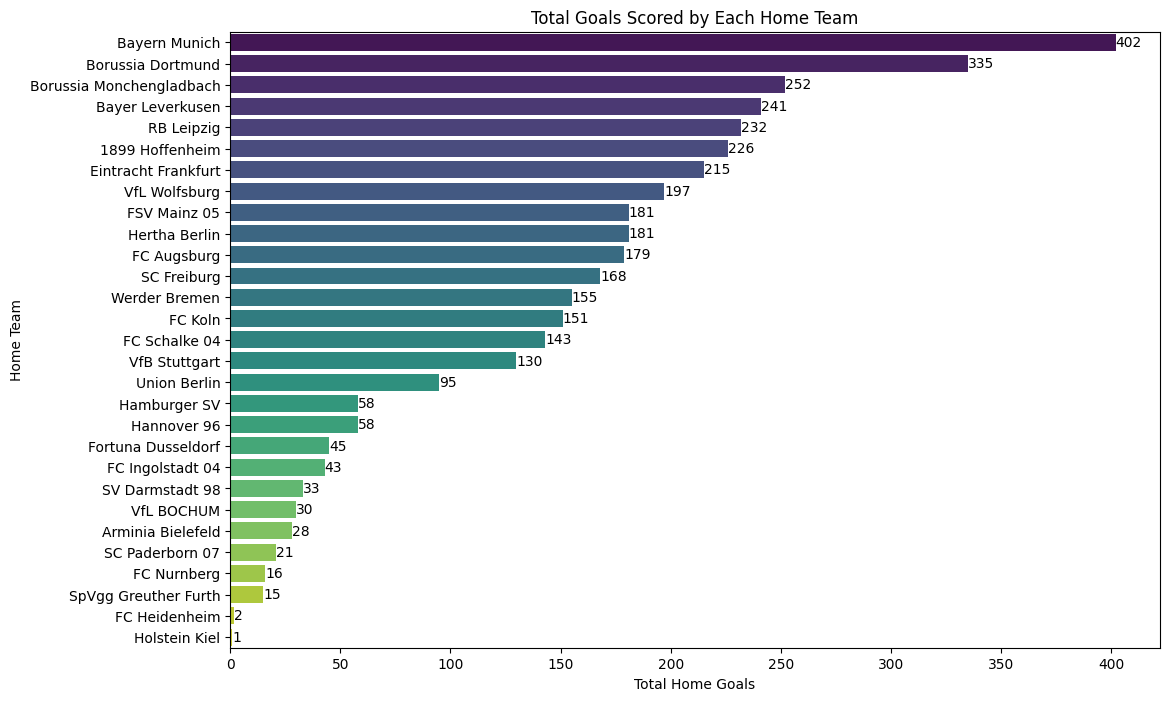

In [ ]:
# Group the data by home_name and sum the home_goals for each team
home_goals_by_team = data.groupby('home_name')['home_goals'].sum().reset_index()

# Sort the teams by the total number of goals scored
home_goals_by_team = home_goals_by_team.sort_values(by='home_goals', ascending=False)

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='home_goals', y='home_name', data=home_goals_by_team, palette='viridis')

plt.xlabel('Total Home Goals')
plt.ylabel('Home Team')
plt.title('Total Goals Scored by Each Home Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

<ipython-input-107-abc05fcbc8da>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team1 Shots on Goal', y='home_name', data=home_shots_on_goal, palette='viridis')


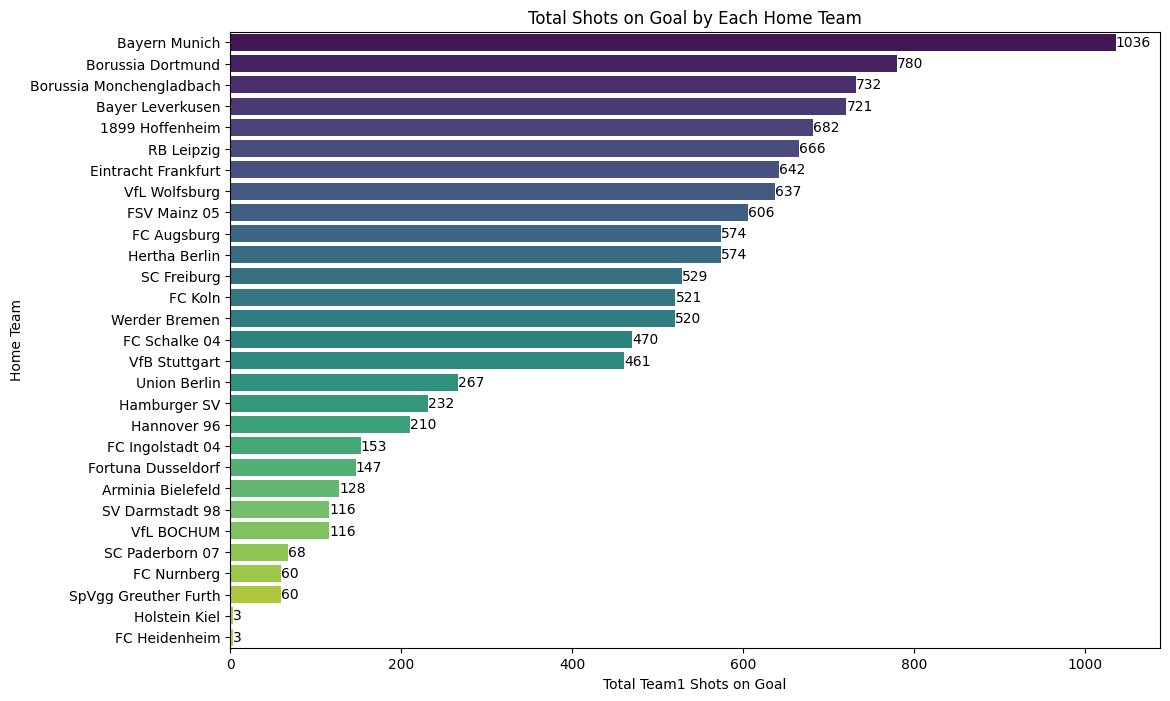

In [ ]:
# Group the data by home_name and sum the Team1 Shots on Goal for each team
home_shots_on_goal = data.groupby('home_name')['Team1 Shots on Goal'].sum().reset_index()

# Sort the teams by the total number of shots on goal
home_shots_on_goal = home_shots_on_goal.sort_values(by='Team1 Shots on Goal', ascending=False)

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='Team1 Shots on Goal', y='home_name', data=home_shots_on_goal, palette='viridis')

plt.xlabel('Total Team1 Shots on Goal')
plt.ylabel('Home Team')
plt.title('Total Shots on Goal by Each Home Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


<ipython-input-108-a89bbe4f310c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team1 Shots off Goal', y='home_name', data=home_shots_off_goal, palette='viridis')


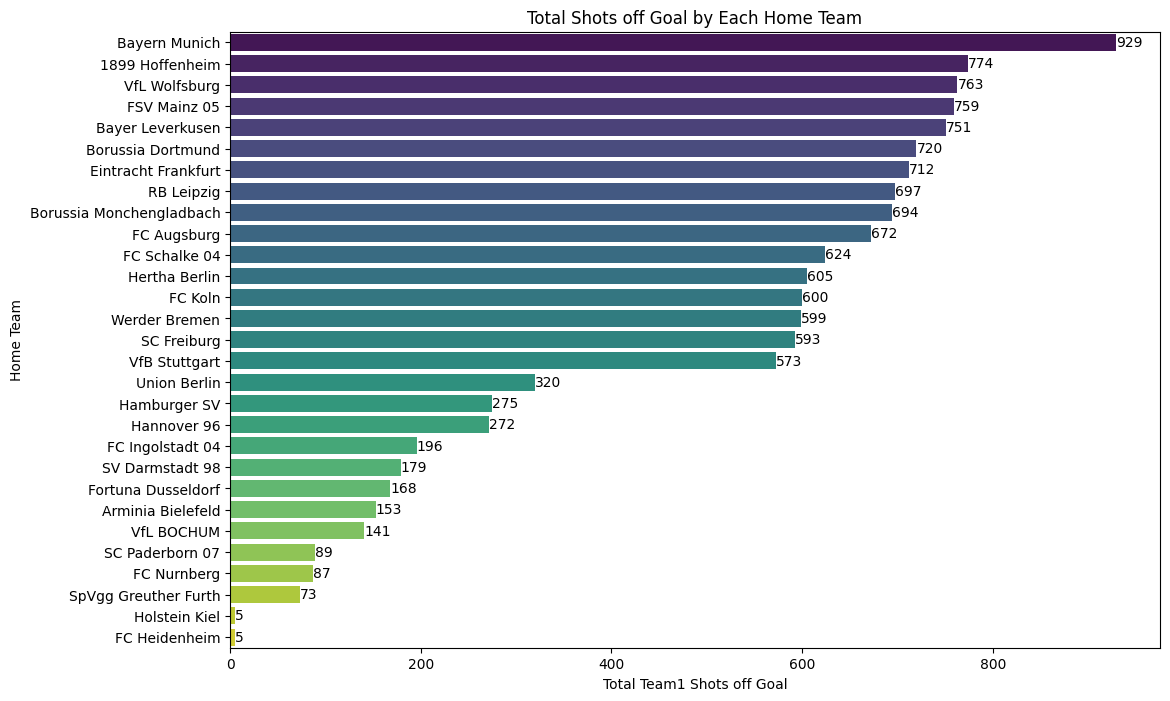

In [ ]:
# Group the data by home_name and sum the Team1 Shots off Goal for each team
home_shots_off_goal = data.groupby('home_name')['Team1 Shots off Goal'].sum().reset_index()

# Sort the teams by the total number of shots off goal
home_shots_off_goal = home_shots_off_goal.sort_values(by='Team1 Shots off Goal', ascending=False)

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='Team1 Shots off Goal', y='home_name', data=home_shots_off_goal, palette='viridis')

plt.xlabel('Total Team1 Shots off Goal')
plt.ylabel('Home Team')
plt.title('Total Shots off Goal by Each Home Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


<ipython-input-109-d419f2b4b36b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='win_percentage', y='away_name', data=away_stats, palette='viridis')


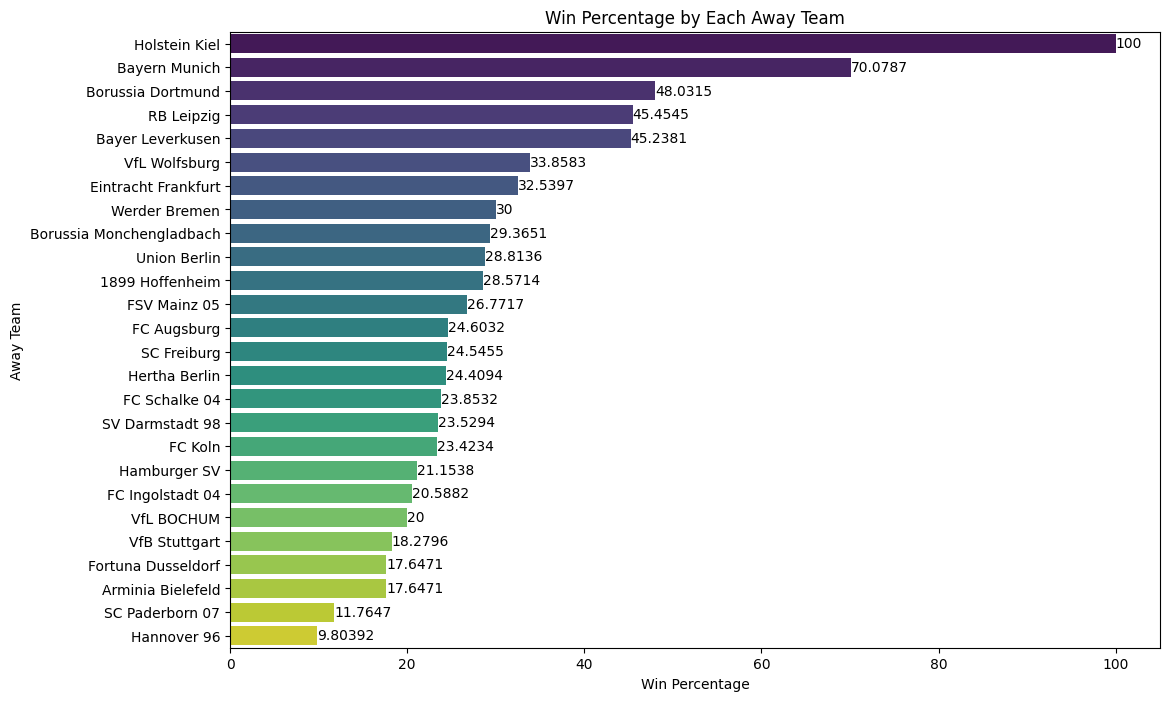

In [ ]:

# Calculate the number of wins for each away team
away_wins = data[data['away_winner'] == True]['away_name'].value_counts().reset_index()
away_wins.columns = ['away_name', 'wins']

# Calculate the total number of matches for each away team
total_away_matches = data['away_name'].value_counts().reset_index()
total_away_matches.columns = ['away_name', 'total_matches']

# Merge the wins and total matches data
away_stats = pd.merge(away_wins, total_away_matches, on='away_name')

# Calculate the win percentage
away_stats['win_percentage'] = (away_stats['wins'] / away_stats['total_matches']) * 100

# Sort the teams by win percentage
away_stats = away_stats.sort_values(by='win_percentage', ascending=False)

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='win_percentage', y='away_name', data=away_stats, palette='viridis')

plt.xlabel('Win Percentage')
plt.ylabel('Away Team')
plt.title('Win Percentage by Each Away Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


<ipython-input-110-3f510b08d8e4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Matches Won', y='Team', data=winning_team_df, palette='viridis')


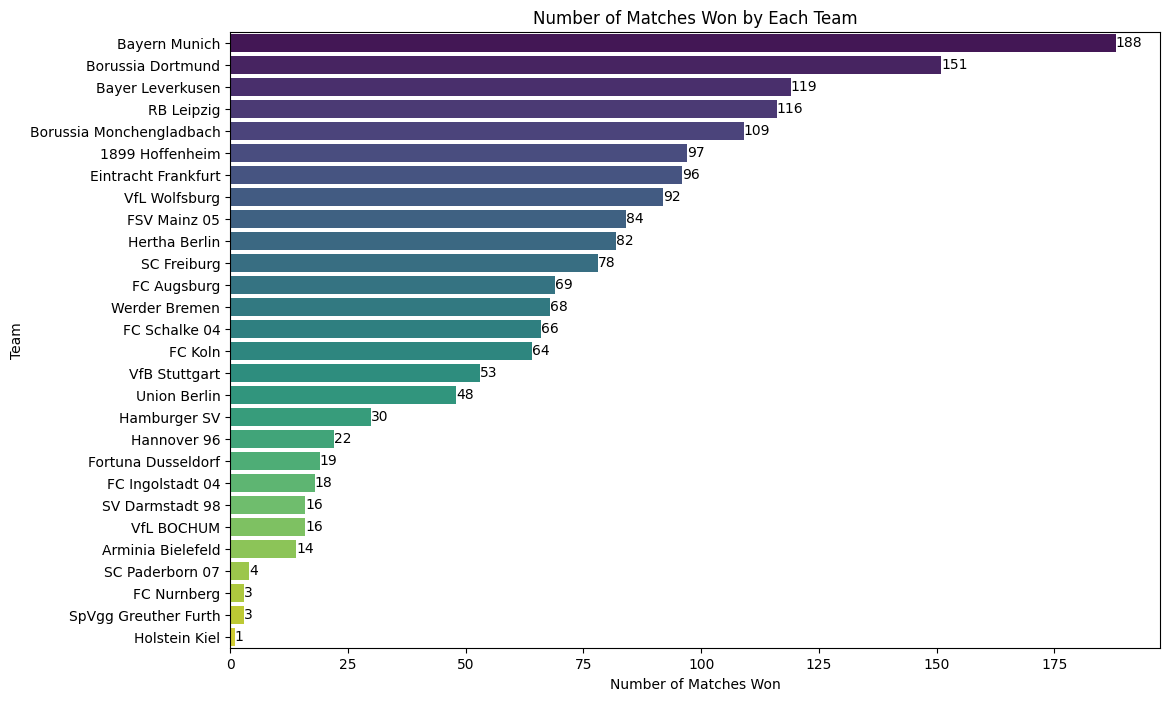

In [ ]:
# Add a column to identify the winning team
data['winning_team'] = data.apply(
    lambda row: row['home_name'] if row['home_goals'] > row['away_goals']
    else (row['away_name'] if row['home_goals'] < row['away_goals']
    else 'Draw'), axis=1
)

# Remove 'Draw' from the winning_team_counts
winning_team_counts = data['winning_team'].value_counts()
winning_team_counts = winning_team_counts[winning_team_counts.index != 'Draw']

# Create a DataFrame for visualization
winning_team_df = winning_team_counts.reset_index()
winning_team_df.columns = ['Team', 'Matches Won']


plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='Matches Won', y='Team', data=winning_team_df, palette='viridis')

plt.xlabel('Number of Matches Won')
plt.ylabel('Team')
plt.title('Number of Matches Won by Each Team')

# Adding data labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()


<ipython-input-111-842ca697e032>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Matches Won', y='Team', data=winning_team_df, palette='viridis')


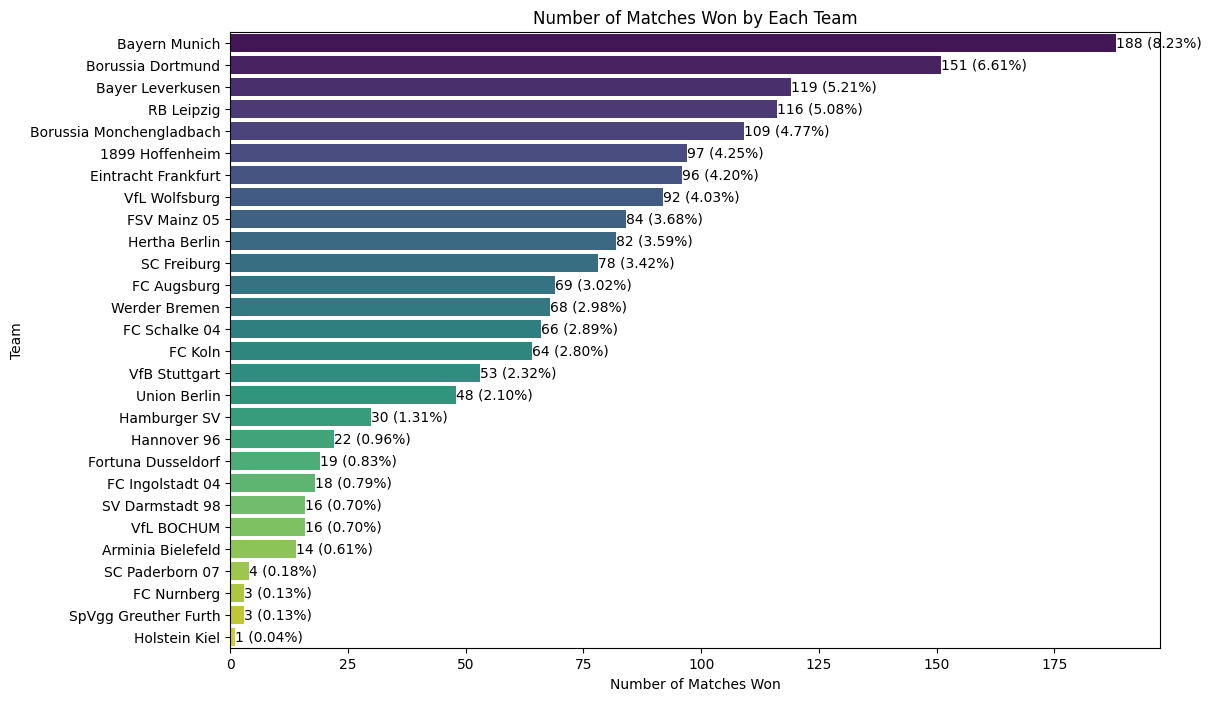

In [ ]:
# Add a column to identify the winning team
data['winning_team'] = data.apply(
    lambda row: row['home_name'] if row['home_goals'] > row['away_goals']
    else (row['away_name'] if row['home_goals'] < row['away_goals']
    else 'Draw'), axis=1
)

# Remove 'Draw' from the winning_team_counts
winning_team_counts = data['winning_team'].value_counts()
winning_team_counts = winning_team_counts[winning_team_counts.index != 'Draw']


# Calculate the percentage of matches won by each team
total_matches = len(data)
winning_team_percentages = (winning_team_counts / total_matches) * 100

# Create a DataFrame for visualization
winning_team_df = winning_team_counts.reset_index()
winning_team_df.columns = ['Team', 'Matches Won']
winning_team_df['Percentage Won'] = winning_team_percentages[winning_team_counts.index].values

plt.figure(figsize=(12, 8))

# Create a bar plot
ax = sns.barplot(x='Matches Won', y='Team', data=winning_team_df, palette='viridis')

plt.xlabel('Number of Matches Won')
plt.ylabel('Team')
plt.title('Number of Matches Won by Each Team')

# Adding data labels on the bars with percentage
for index, row in winning_team_df.iterrows():
    ax.text(row['Matches Won'], index, f"{row['Matches Won']} ({row['Percentage Won']:.2f}%)",
            color='black', ha='left', va='center', fontsize=10)

plt.show()


<ipython-input-112-3aed44965980>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Total Corners', data=corners_df, palette='viridis')


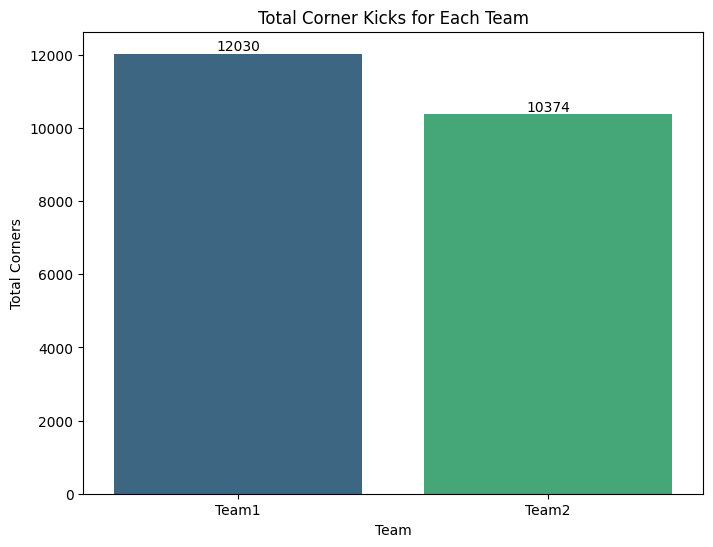

In [ ]:
# Calculate the total number of corner kicks for Team1 and Team2
total_corners_team1 = data['Team1 Corner Kicks'].sum()
total_corners_team2 = data['Team2 Corner Kicks'].sum()

# Create a DataFrame for visualization
corners_df = pd.DataFrame({
    'Team': ['Team1', 'Team2'],
    'Total Corners': [total_corners_team1, total_corners_team2]
})

plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x='Team', y='Total Corners', data=corners_df, palette='viridis')

plt.xlabel('Team')
plt.ylabel('Total Corners')
plt.title('Total Corner Kicks for Each Team')

# Adding data labels on the bars
for index, row in corners_df.iterrows():
    ax.text(index, row['Total Corners'] + 10, int(row['Total Corners']),
            color='black', ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-113-f2b97bdf18bd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Total Corners 1st Half', data=corners_1st_half_df, palette='viridis')


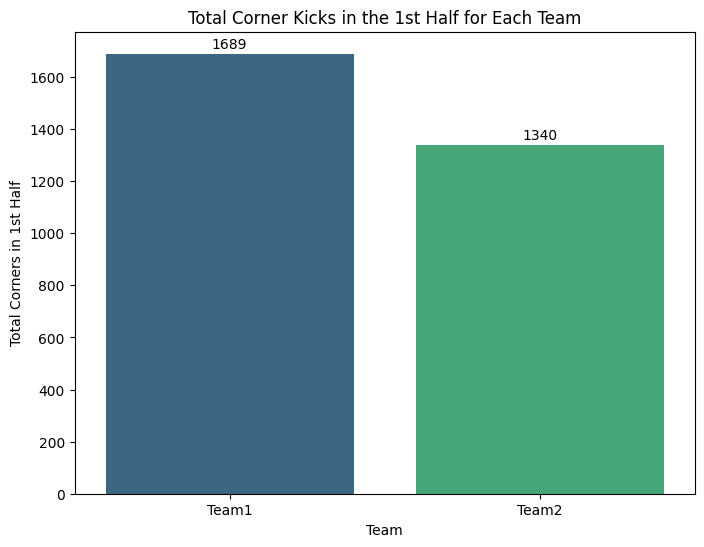

In [ ]:
# Calculate the number of corner kicks in the 1st half for each team
data['Team1 Corner Kicks 1st Half'] = data['halftimehome']
data['Team2 Corner Kicks 1st Half'] = data['halftimeaway']

# Calculate the total number of corner kicks in the 1st half
total_corners_1st_half_team1 = data['Team1 Corner Kicks 1st Half'].sum()
total_corners_1st_half_team2 = data['Team2 Corner Kicks 1st Half'].sum()

# Create a DataFrame for visualization
corners_1st_half_df = pd.DataFrame({
    'Team': ['Team1', 'Team2'],
    'Total Corners 1st Half': [total_corners_1st_half_team1, total_corners_1st_half_team2]
})

plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x='Team', y='Total Corners 1st Half', data=corners_1st_half_df, palette='viridis')

plt.xlabel('Team')
plt.ylabel('Total Corners in 1st Half')
plt.title('Total Corner Kicks in the 1st Half for Each Team')

# Adding data labels on the bars
for index, row in corners_1st_half_df.iterrows():
    ax.text(index, row['Total Corners 1st Half'] + 10, int(row['Total Corners 1st Half']),
            color='black', ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-114-35d1129a3157>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Total Corners 2nd Half', data=corners_2nd_half_df, palette='viridis')


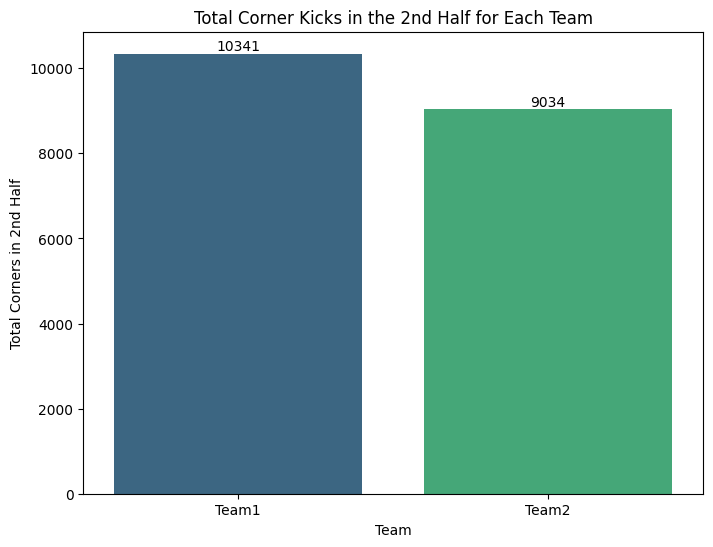

In [ ]:
# Calculate the number of corner kicks in the 2nd half for each team
data['Team1 Corner Kicks 2nd Half'] = data['Team1 Corner Kicks'] - data['halftimehome']
data['Team2 Corner Kicks 2nd Half'] = data['Team2 Corner Kicks'] - data['halftimeaway']

# Calculate the total number of corner kicks in the 2nd half
total_corners_2nd_half_team1 = data['Team1 Corner Kicks 2nd Half'].sum()
total_corners_2nd_half_team2 = data['Team2 Corner Kicks 2nd Half'].sum()

# Create a DataFrame for visualization
corners_2nd_half_df = pd.DataFrame({
    'Team': ['Team1', 'Team2'],
    'Total Corners 2nd Half': [total_corners_2nd_half_team1, total_corners_2nd_half_team2]
})

plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x='Team', y='Total Corners 2nd Half', data=corners_2nd_half_df, palette='viridis')

plt.xlabel('Team')
plt.ylabel('Total Corners in 2nd Half')
plt.title('Total Corner Kicks in the 2nd Half for Each Team')

# Adding data labels on the bars
for index, row in corners_2nd_half_df.iterrows():
    ax.text(index, row['Total Corners 2nd Half'] + 10, int(row['Total Corners 2nd Half']),
            color='black', ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-115-ae5e0112908a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Team', y='Total Yellow Cards', data=yellow_cards_df, palette='viridis')


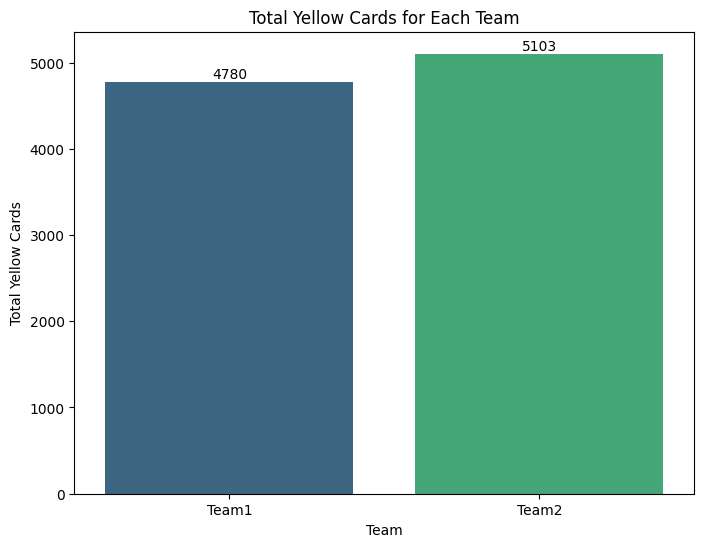

Average Yellow Cards per Match for Team1: 2.09
Average Yellow Cards per Match for Team2: 2.23


In [ ]:
# Calculate the total number of yellow cards for Team1 and Team2
total_yellow_cards_team1 = data['Team1 Yellow Cards'].sum()
total_yellow_cards_team2 = data['Team2 Yellow Cards'].sum()

# Create a DataFrame for visualization
yellow_cards_df = pd.DataFrame({
    'Team': ['Team1', 'Team2'],
    'Total Yellow Cards': [total_yellow_cards_team1, total_yellow_cards_team2]
})

plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x='Team', y='Total Yellow Cards', data=yellow_cards_df, palette='viridis')

plt.xlabel('Team')
plt.ylabel('Total Yellow Cards')
plt.title('Total Yellow Cards for Each Team')

# Adding data labels on the bars
for index, row in yellow_cards_df.iterrows():
    ax.text(index, row['Total Yellow Cards'] + 0.5, int(row['Total Yellow Cards']),
            color='black', ha='center', va='bottom', fontsize=10)

plt.show()

# Calculate the average number of yellow cards per match for each team
avg_yellow_cards_team1 = data['Team1 Yellow Cards'].mean()
avg_yellow_cards_team2 = data['Team2 Yellow Cards'].mean()

print(f"Average Yellow Cards per Match for Team1: {avg_yellow_cards_team1:.2f}")
print(f"Average Yellow Cards per Match for Team2: {avg_yellow_cards_team2:.2f}")


<ipython-input-116-b7b7df0a02cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='venue_name', data=data, palette='viridis')


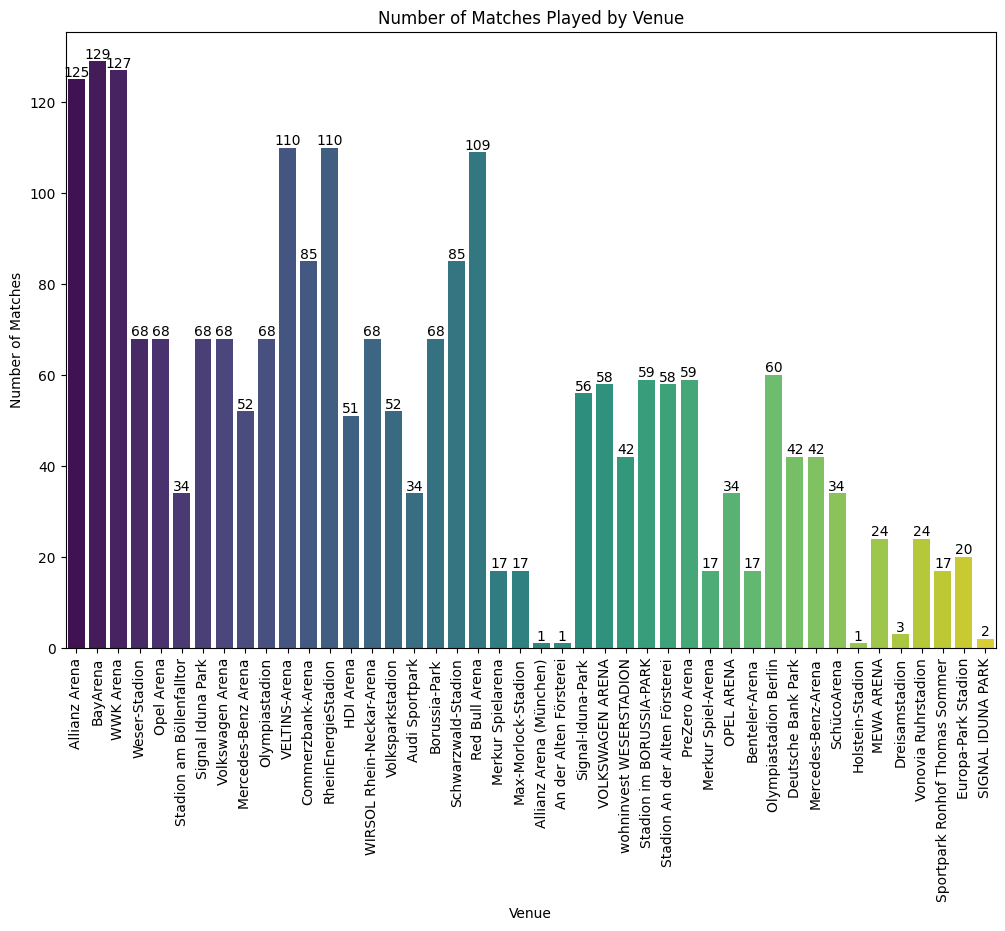

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a countplot using Seaborn to show the number of matches played at each venue
# 'x' specifies the column to plot on the x-axis, 'data' is the DataFrame containing the data
ax = sns.countplot(x='venue_name', data=data, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Number of Matches')

# Set the title of the plot
plt.title('Number of Matches Played by Venue')

# Add the count labels on top of each bar in the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Display the plot
plt.show()


<ipython-input-117-dd1463ccb725>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_venues.index, y=top_venues.values, palette='viridis')


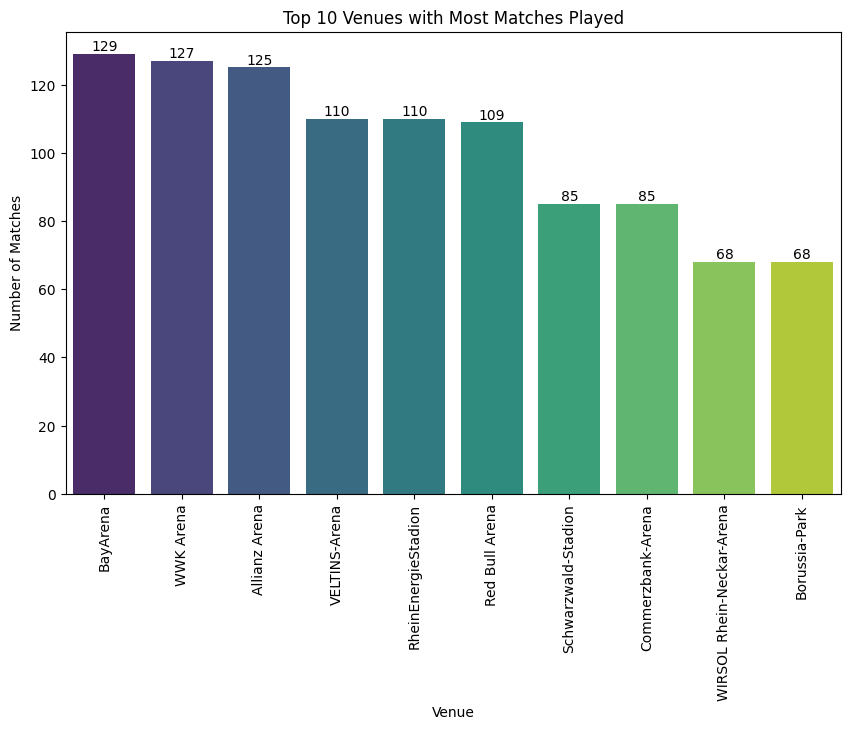

In [ ]:
# Get the top 10 venues with the highest number of matches played
top_venues = data['venue_name'].value_counts().head(10)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a barplot using Seaborn for the top 10 venues
ax = sns.barplot(x=top_venues.index, y=top_venues.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Number of Matches')

# Set the title of the plot
plt.title('Top 10 Venues with Most Matches Played')

# Add the count labels on top of each bar in the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Display the plot
plt.show()


In [ ]:
# Count the number of True and False values for home_winner
home_winner_counts = data['home_winner'].value_counts()

# Display the counts
print("Counts of Home Winner Status:")
print(f"True (Home Wins): {home_winner_counts.get(True, 0)}")
print(f"False (Home Losses): {home_winner_counts.get(False, 0)}")


Counts of Home Winner Status:
True (Home Wins): 1577
False (Home Losses): 707


<ipython-input-119-df500d39ab6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=home_winner_counts.index.astype(str), y=home_winner_counts.values, palette='viridis')


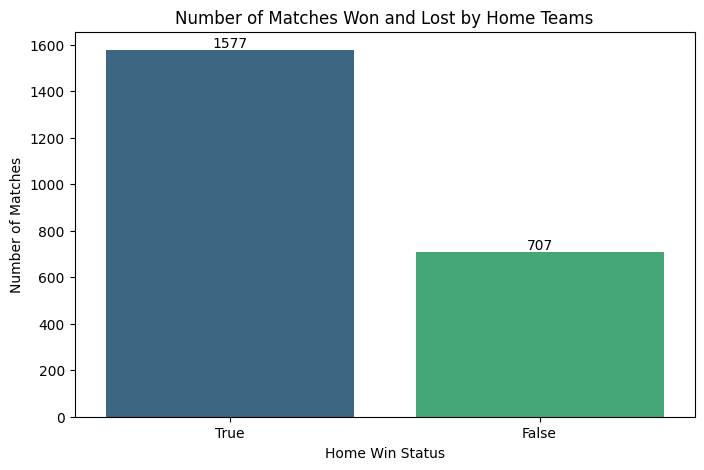

In [ ]:
# Count the number of True and False values for home_winner
home_winner_counts = data['home_winner'].value_counts()

plt.figure(figsize=(8, 5))

# Create a bar plot with counts of True and False values
ax = sns.barplot(x=home_winner_counts.index.astype(str), y=home_winner_counts.values, palette='viridis')

# Set labels for x and y axes
plt.xlabel('Home Win Status')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Won and Lost by Home Teams')

# Add the count label on top of each bar
for i in ax.containers:
    ax.bar_label(i)

# Display the plot
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   date                         2284 non-null   datetime64[ns, UTC]
 1   venue_name                   2284 non-null   object             
 2   city                         2284 non-null   object             
 3   elapsed                      2284 non-null   int64              
 4   league_id                    2284 non-null   int64              
 5   league_name                  2284 non-null   object             
 6   season                       2284 non-null   int64              
 7   home_name                    2284 non-null   object             
 8   home_winner                  2284 non-null   bool               
 9   away_name                    2284 non-null   object             
 10  away_winner                  2284 non-null   boo

# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['venue_name', 'city', 'league_name', 'home_name', 'away_name']

# Apply label encoding to each specified column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Boolean columns are already numeric, so no need to encode them


In [ ]:

# Assuming 'data' is your DataFrame

# Encode the 'home_winner' and 'away_winner' columns
data['home_winner'] = data['home_winner'].astype(int)
data['away_winner'] = data['away_winner'].astype(int)

# Display the first few rows to check the encoding
print(data[['home_winner', 'away_winner']].head())


   home_winner  away_winner
0            1            0
1            1            0
2            0            1
3            0            1
4            0            1


In [ ]:
data=data.drop(['date'],axis=1)

In [ ]:

data=data.drop(['winning_team'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   venue_name                   2284 non-null   int64  
 1   city                         2284 non-null   int64  
 2   elapsed                      2284 non-null   int64  
 3   league_id                    2284 non-null   int64  
 4   league_name                  2284 non-null   int64  
 5   season                       2284 non-null   int64  
 6   home_name                    2284 non-null   int64  
 7   home_winner                  2284 non-null   int64  
 8   away_name                    2284 non-null   int64  
 9   away_winner                  2284 non-null   int64  
 10  home_goals                   2284 non-null   int64  
 11  away_goals                   2284 non-null   int64  
 12  halftimehome                 2284 non-null   int64  
 13  halftimeaway      



# **Wining Possibility by goal**


In [ ]:
!pip install scikit-plot

# **Random Forest Classifier**

In [ ]:

# Determine the winner of each match
data['match_winner'] = data.apply(
    lambda row: 'Home' if row['home_goals'] > row['away_goals']
    else ('Away' if row['home_goals'] < row['away_goals']
    else 'Draw'), axis=1
)

# Encode the target variable as numerical values
data['match_winner_encoded'] = data['match_winner'].apply(lambda x: 1 if x == 'Home' else (2 if x == 'Away' else 0))

# Define an expanded list of features
features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'Team1 Corner Kicks 1st Half', 'Team2 Corner Kicks 1st Half',
    'Team1 Corner Kicks 2nd Half', 'Team2 Corner Kicks 2nd Half',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

# Prepare the data
X = data[features]
y = data['match_winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Determine unique values in y_test and y_pred
unique_y_test = np.unique(y_test)
unique_y_pred = np.unique(y_pred)

# Generate the classification report
target_names = {0: 'Draw', 1: 'Home', 2: 'Away'}
class_report = classification_report(y_test, y_pred, target_names=[target_names[i] for i in unique_y_test])
print(class_report)

# Print feature names for reference
print("Feature Names:", features)


              precision    recall  f1-score   support

        Draw       0.97      0.93      0.95       161
        Home       0.98      1.00      0.99       311
        Away       0.98      0.98      0.98       214

    accuracy                           0.98       686
   macro avg       0.98      0.97      0.97       686
weighted avg       0.98      0.98      0.98       686

Feature Names: ['home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal', 'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls', 'Team1 Blocked Shots', 'Team2 Blocked Shots', 'Team1 Shots insidebox', 'Team2 Shots insidebox', 'Team1 Shots outsidebox', 'Team2 Shots outsidebox', 'Team1 Offsides', 'Team2 Offsides', 'Team1 Yellow Cards', 'Team2 Yellow Cards', 'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves', 'Team1 Total passes', 'Team2 Total passes', 'Team1 Passes accurate', 'Team2 Passes accurate', 'Team1 Corner Kicks 1st Half', 'Team2 Corner Kicks 1st Half', 'Team1 Corner Kicks

# **Random Forest Classifier using specific features**







In [ ]:

# Define features and target
features = ['home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
             'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls']
X = data[features]
y = data['match_winner_encoded']
#X= data.drop('match_winner_encoded', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Draw', 'Home', 'Away'])
print(class_report)


              precision    recall  f1-score   support

        Draw       0.95      1.00      0.98       161
        Home       1.00      0.99      0.99       311
        Away       1.00      0.98      0.99       214

    accuracy                           0.99       686
   macro avg       0.98      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



# **Multiple ML Model Check**

Model:  Logistic Regression
Validation Accuracy:  0.892128279883382
Training Accuracy:  0.8911138923654568


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


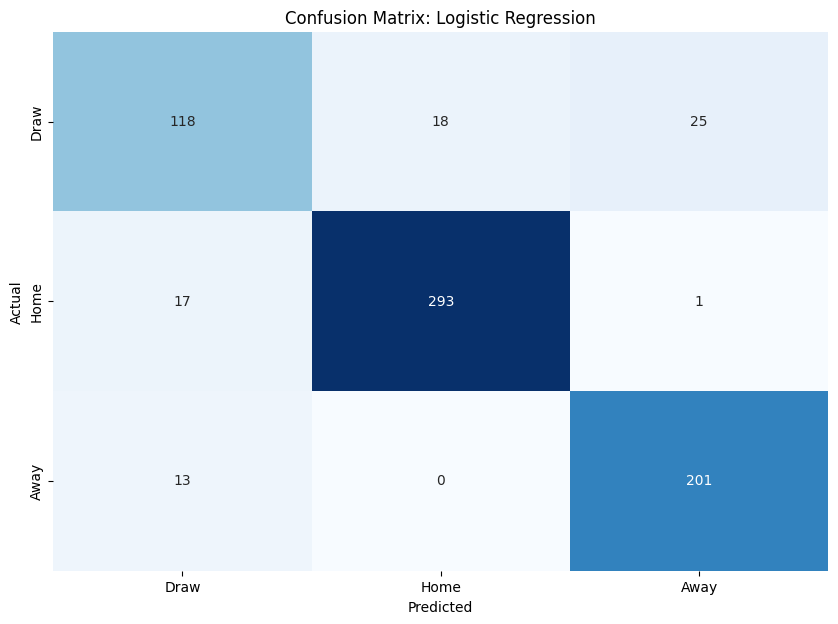

Model:  Decision Tree Classifier
Validation Accuracy:  1.0
Training Accuracy:  1.0


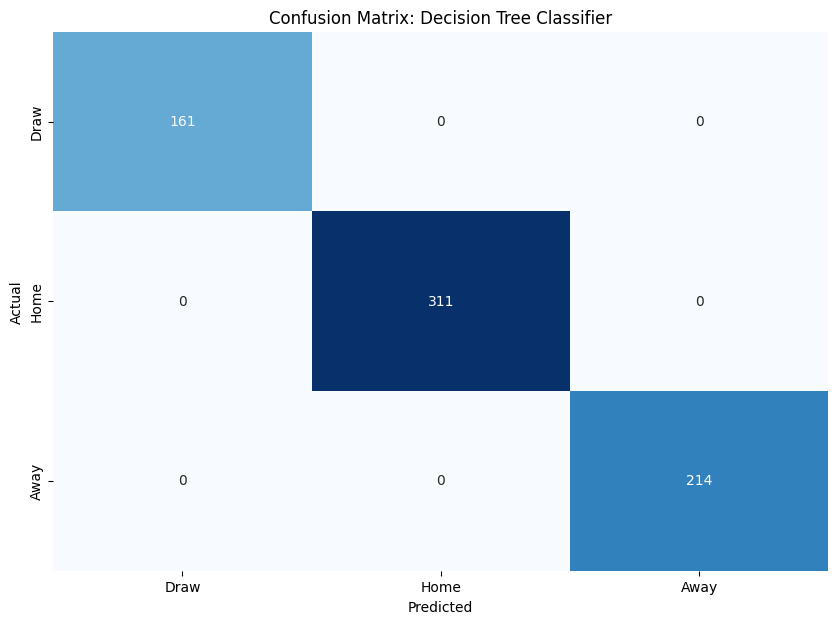

Model:  Random Forest
Validation Accuracy:  0.9795918367346939
Training Accuracy:  1.0


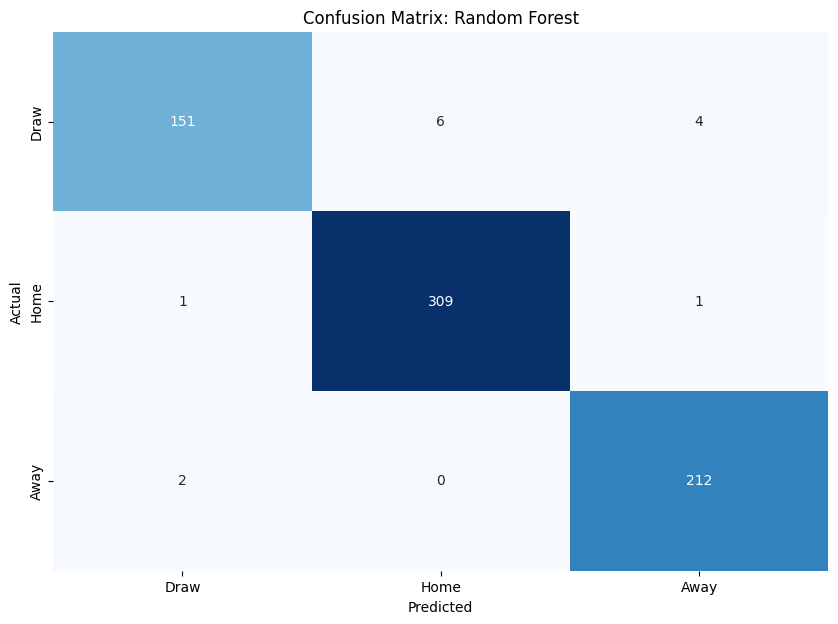

Model:  Linear Discriminant Analysis
Validation Accuracy:  0.8892128279883382
Training Accuracy:  0.8948685857321652


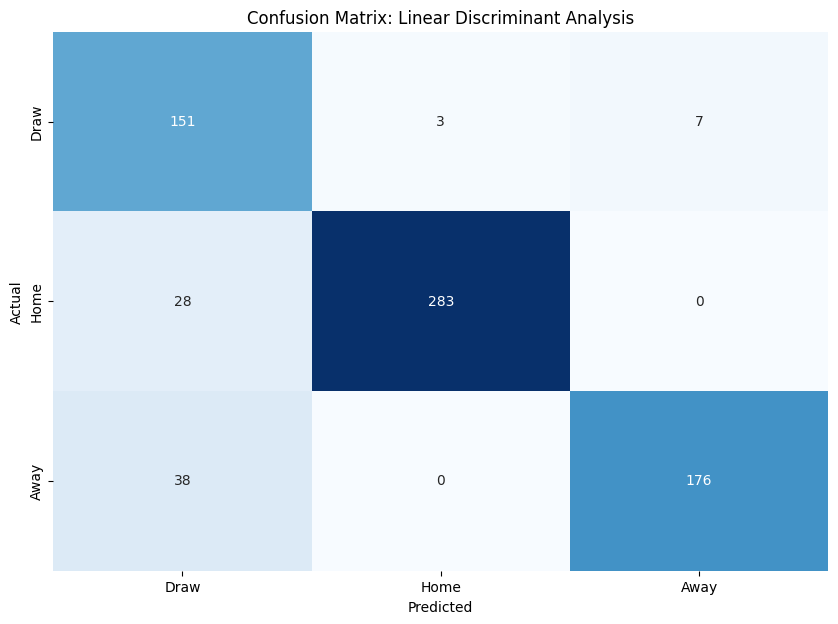

Model:  Ada Boost
Validation Accuracy:  0.7565597667638484
Training Accuracy:  0.7972465581977471


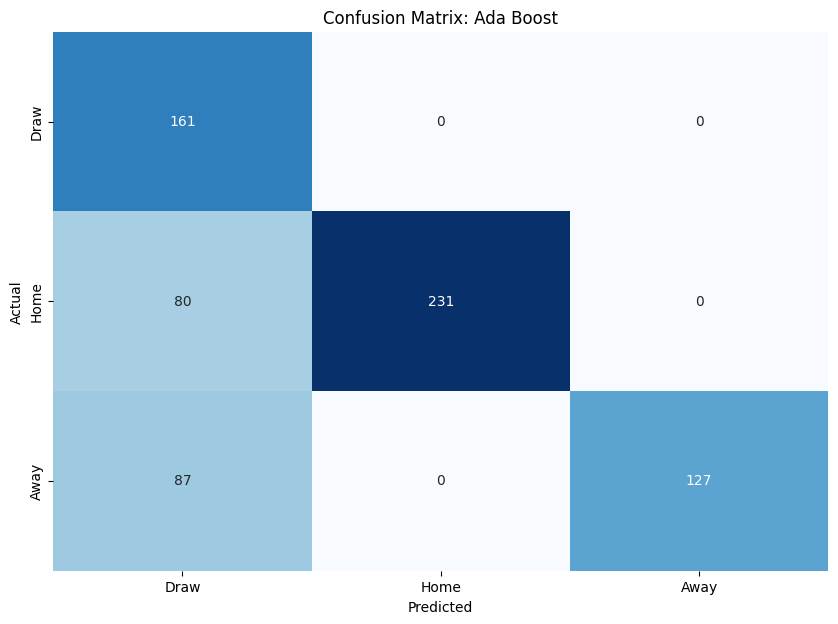

Model:  XGBClassifier
Validation Accuracy:  0.9985422740524781
Training Accuracy:  1.0


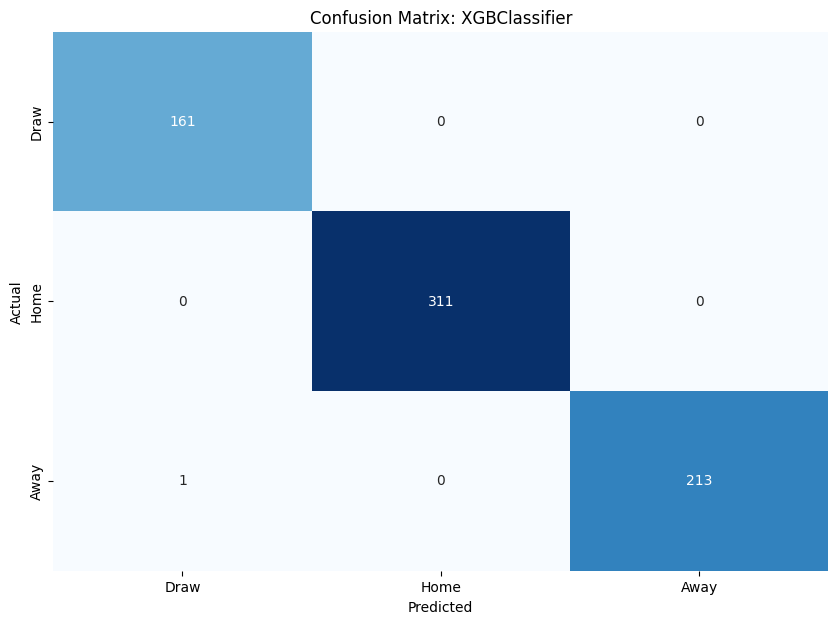

Model:  Gradient Boosting
Validation Accuracy:  0.9956268221574344
Training Accuracy:  1.0


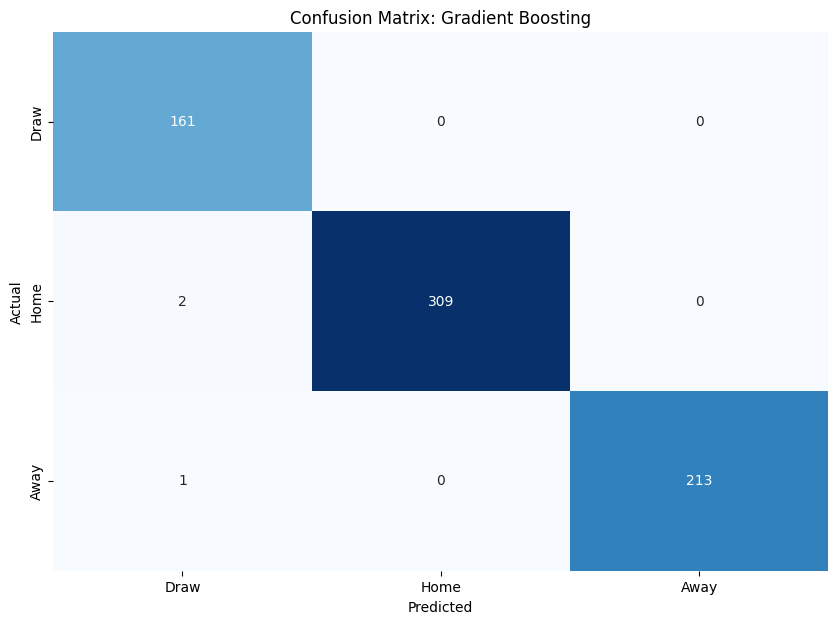

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 31
[LightGBM] [Info] Start training from score -1.392572
[LightGBM] [Info] Start training from score -0.814064
[LightGBM] [Info] Start training from score -1.175999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

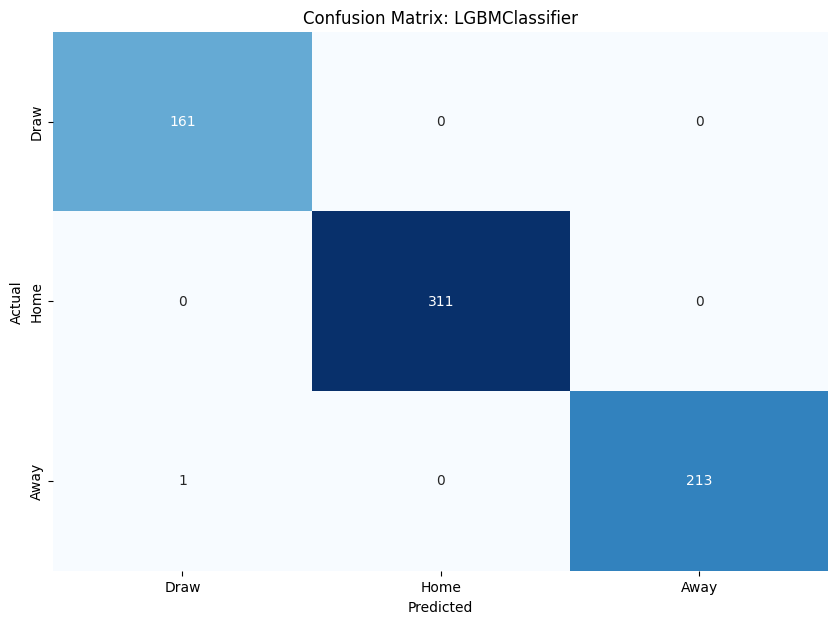

In [ ]:
# Define an expanded list of features
features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'Team1 Corner Kicks 1st Half', 'Team2 Corner Kicks 1st Half',
    'Team1 Corner Kicks 2nd Half', 'Team2 Corner Kicks 2nd Half',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

# Prepare the data
X = data[features]
y = data['match_winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Ada Boost', AdaBoostClassifier()),
    ('XGBClassifier', XGBClassifier(eval_metric='mlogloss')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LGBMClassifier', LGBMClassifier())
]

# List to store model scores
models_score = []

for name, model in models:
    # Fit the model
    model.fit(X_train_imputed, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_imputed)

    # Calculate accuracy
    val_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train_imputed))

    # Append scores
    models_score.append([name, val_accuracy])

    # Print accuracies
    print("Model: ", name)
    print('Validation Accuracy: ', val_accuracy)
    print('Training Accuracy: ', train_accuracy)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Draw', 'Home', 'Away'], yticklabels=['Draw', 'Home', 'Away'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# **Ensemble Model check combined more than two ML model**

Validation Accuracy:  0.9985422740524781
Training Accuracy:  1.0


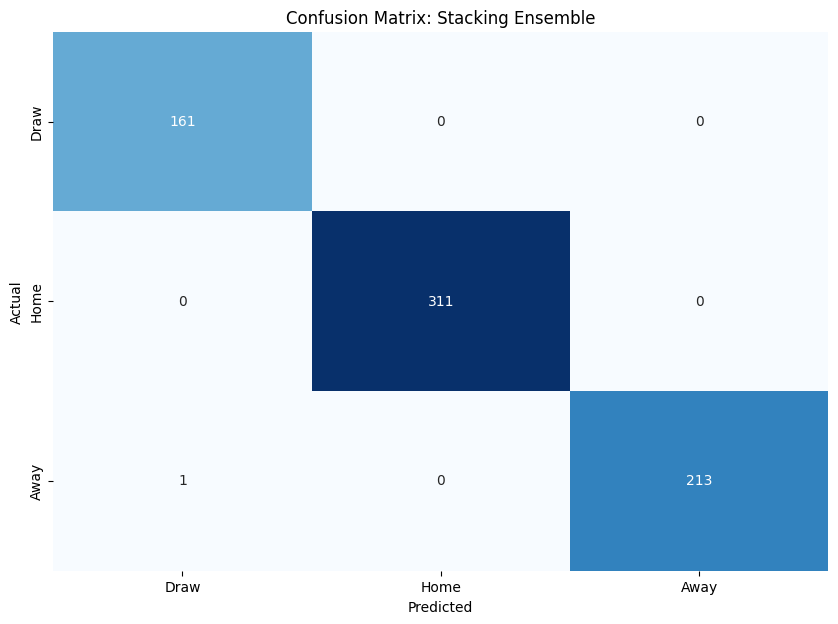

In [ ]:

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define base models
base_models = [
    ('random_forest', RandomForestClassifier()),
    ('xgb', XGBClassifier(eval_metric='mlogloss'))
]

# Define meta model
meta_model = LogisticRegression(max_iter=1000)

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model
stacking_model.fit(X_train_imputed, y_train)

# Predict on test set
y_pred = stacking_model.predict(X_test_imputed)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, stacking_model.predict(X_train_imputed))

print('Validation Accuracy: ', val_accuracy)
print('Training Accuracy: ', train_accuracy)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix: Stacking Ensemble')
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home', 'Away'], yticklabels=['Draw', 'Home', 'Away'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# **Check out with different hyperparameter on Random Forest model**

Validation Accuracy:  0.9810495626822158
Training Accuracy:  1.0


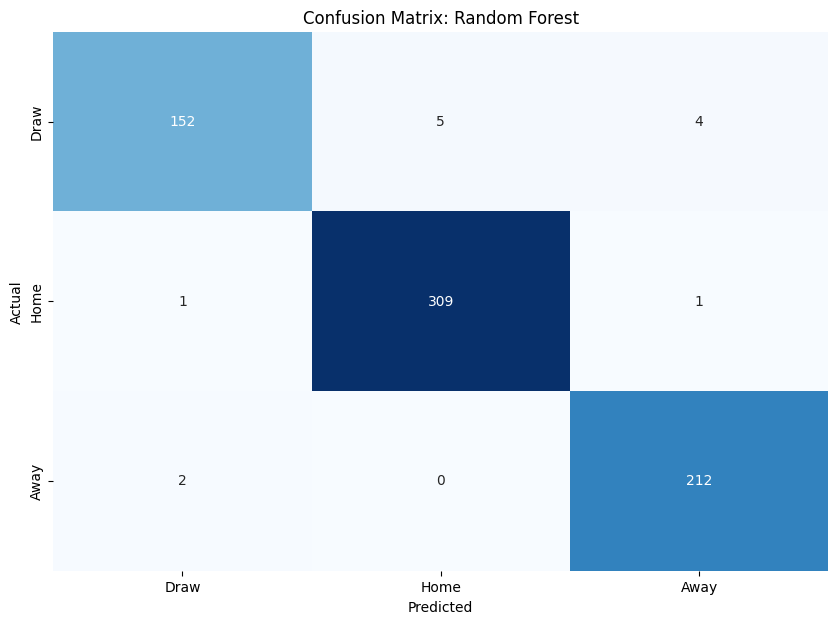

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define RandomForestClassifier with specific parameters
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Maximum depth of the trees (None means nodes are expanded until all leaves are pure)
    min_samples_split=5,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    max_features='sqrt',    # Number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random seed for reproducibility
)

# Train the RandomForestClassifier
rf_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_imputed)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train_imputed))

print('Validation Accuracy: ', val_accuracy)
print('Training Accuracy: ', train_accuracy)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cf_matrix = confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix: Random Forest')
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home', 'Away'], yticklabels=['Draw', 'Home', 'Away'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Check out with CNN model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models


X = data[features]
y = data['match_winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the neural network model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(512, activation='relu'),             # Hidden layer with 512 units and ReLU activation
    layers.Dense(3, activation='softmax')             # Output layer with 3 units (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', test_accuracy)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,947 (74.01 KB)

 Trainable params: 18,947 (74.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5756 - loss: 0.8840 - val_accuracy: 0.7875 - val_loss: 0.5351
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4981 - val_accuracy: 0.8500 - val_loss: 0.4063
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.3656 - val_accuracy: 0.8969 - val_loss: 0.3268
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9427 - loss: 0.2870 - val_accuracy: 0.9219 - val_loss: 0.2662
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.1927 - val_accuracy: 0.9344 - val_loss: 0.2247
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.1656 - val_accuracy: 0.9625 - val_loss: 0.1798
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.1155 - val_accuracy: 0.9688 - val_loss: 0.1549
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0895 - val_accuracy: 0.9719 - val_loss:

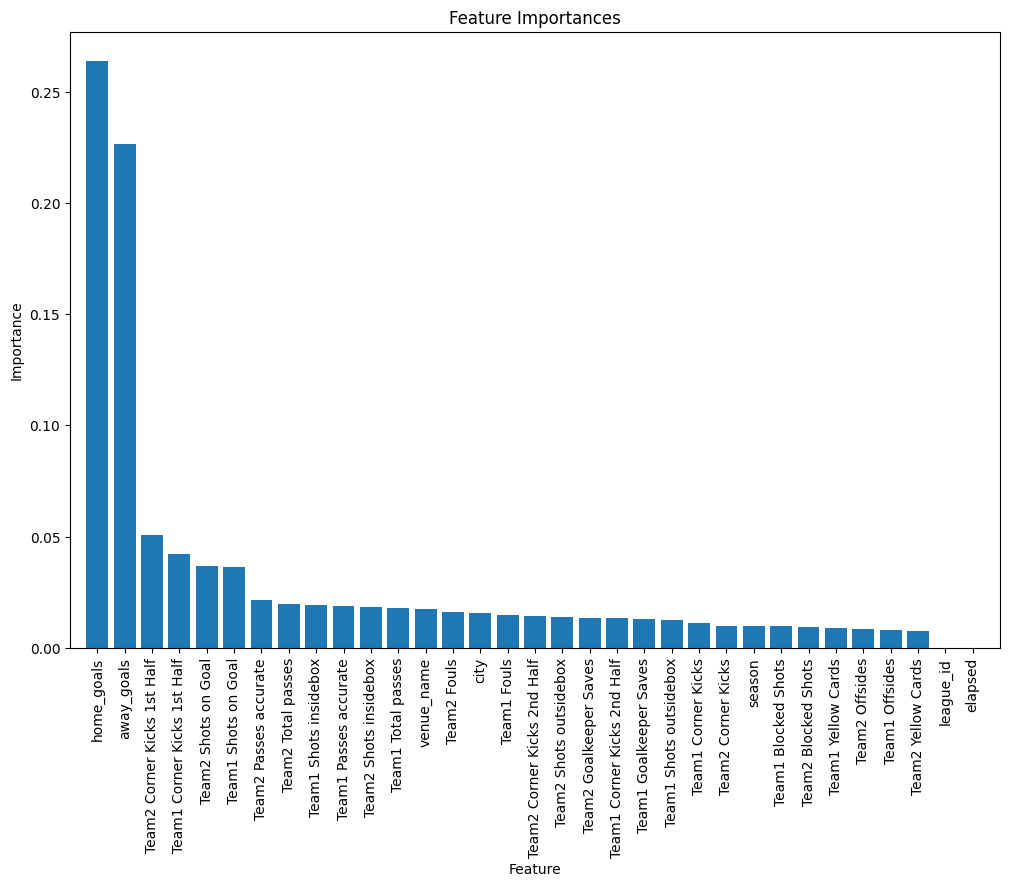

Top 20 Features: ['home_goals' 'away_goals' 'Team2 Corner Kicks 1st Half'
 'Team1 Corner Kicks 1st Half' 'Team2 Shots on Goal' 'Team1 Shots on Goal'
 'Team2 Passes accurate' 'Team2 Total passes' 'Team1 Shots insidebox'
 'Team1 Passes accurate' 'Team2 Shots insidebox' 'Team1 Total passes'
 'venue_name' 'Team2 Fouls' 'city' 'Team1 Fouls'
 'Team2 Corner Kicks 2nd Half' 'Team2 Shots outsidebox'
 'Team2 Goalkeeper Saves' 'Team1 Corner Kicks 2nd Half']
Validation Accuracy with Top 20 Features: 0.9810

Classification Report (Top 20 Features):
               precision    recall  f1-score   support

        Draw       0.96      0.96      0.96       161
        Home       0.98      0.99      0.99       311
        Away       1.00      0.98      0.99       214

    accuracy                           0.98       686
   macro avg       0.98      0.98      0.98       686
weighted avg       0.98      0.98      0.98       686



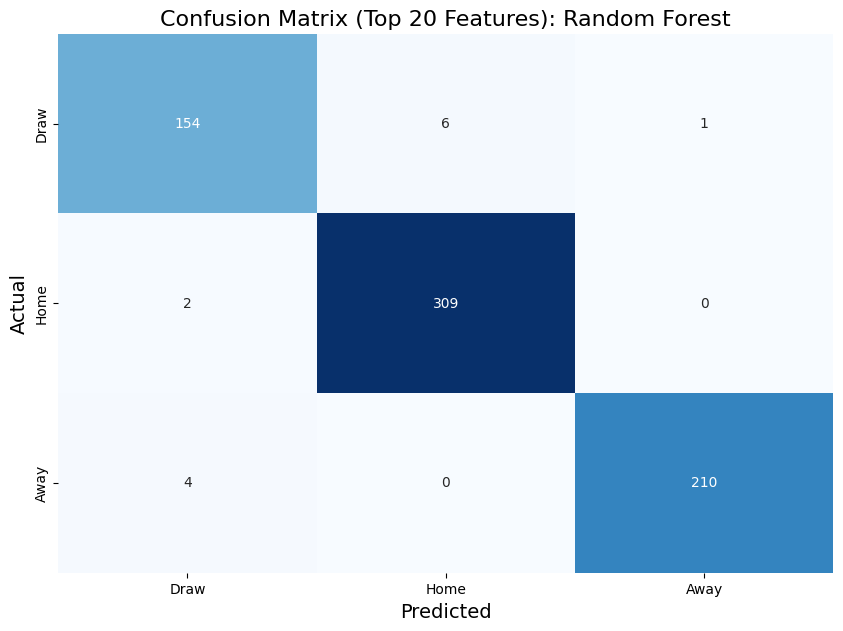

In [ ]:

# Define an expanded list of features
features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'Team1 Corner Kicks 1st Half', 'Team2 Corner Kicks 1st Half',
    'Team1 Corner Kicks 2nd Half', 'Team2 Corner Kicks 2nd Half',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

# Prepare the data (replace 'match_winner_encoded' with your target variable)
X = data[features]
y = data['match_winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Select top 20 features based on feature importance
top_20_indices = indices[:20]
top_20_features = np.array(features)[top_20_indices]

# Print the top 20 features
print(f"Top 20 Features: {top_20_features}")

# Prepare the data again using only the top 20 features
X_top_20 = X[top_20_features]

# Split the data into training and testing sets
X_train_top_20, X_test_top_20, y_train, y_test = train_test_split(X_top_20, y, test_size=0.3, random_state=42)

# Handle missing values and scale the top 20 features
X_train_top_20_imputed = imputer.fit_transform(X_train_top_20)
X_test_top_20_imputed = imputer.transform(X_test_top_20)
X_train_top_20_scaled = scaler.fit_transform(X_train_top_20_imputed)
X_test_top_20_scaled = scaler.transform(X_test_top_20_imputed)

# Retrain the RandomForestClassifier using top 20 features
rf_model_top_20 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model_top_20.fit(X_train_top_20_scaled, y_train)

# Predict on the test set using top 20 features
y_pred_top_20 = rf_model_top_20.predict(X_test_top_20_scaled)

# Calculate and print validation accuracy for top 20 features
val_accuracy_top_20 = accuracy_score(y_test, y_pred_top_20)
print(f'Validation Accuracy with Top 20 Features: {val_accuracy_top_20:.4f}')

# Print classification report for top 20 features
print("\nClassification Report (Top 20 Features):\n", classification_report(y_test, y_pred_top_20, target_names=['Draw', 'Home', 'Away']))

# Plot confusion matrix for top 20 features
plt.figure(figsize=(10, 7))
cf_matrix_top_20 = confusion_matrix(y_test, y_pred_top_20)

# Customize the plot for top 20 feature model
plt.title('Confusion Matrix (Top 20 Features): Random Forest', fontsize=16)
sns.heatmap(cf_matrix_top_20, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Draw', 'Home', 'Away'], yticklabels=['Draw', 'Home', 'Away'])

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


## **[Corner kick Prediction ]**

In [ ]:

features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_proba = rf_model.predict_proba(X_test)

# Print predicted probabilities for the first few samples
print("Predicted probabilities for the first few samples:")
print(y_proba[:5])


Predicted probabilities for the first few samples:
[[0.69 0.31]
 [0.71 0.29]
 [0.46 0.54]
 [0.81 0.19]
 [0.62 0.38]]


In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
print('Validation Accuracy: ', val_accuracy)

# Print classification report
class_report = classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners'])
print(class_report)


Validation Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

 Low Corners       0.75      0.81      0.78       423
High Corners       0.65      0.56      0.60       263

    accuracy                           0.71       686
   macro avg       0.70      0.68      0.69       686
weighted avg       0.71      0.71      0.71       686



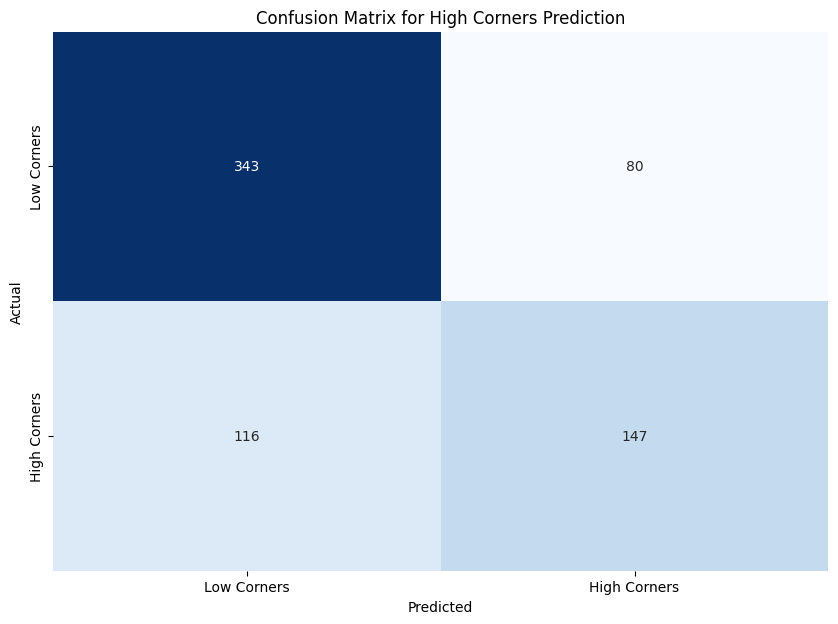

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for High Corners Prediction')
plt.show()



# **Multiple ML Model Check**

Model: Logistic Regression
Validation Accuracy: 0.7362
Training Accuracy: 0.7215



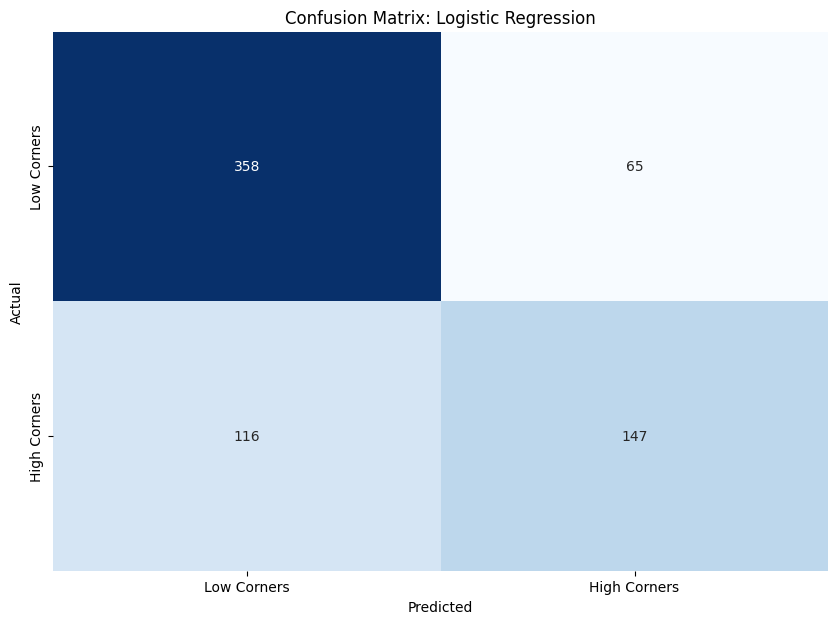

Model: Decision Tree Classifier
Validation Accuracy: 0.6385
Training Accuracy: 1.0000



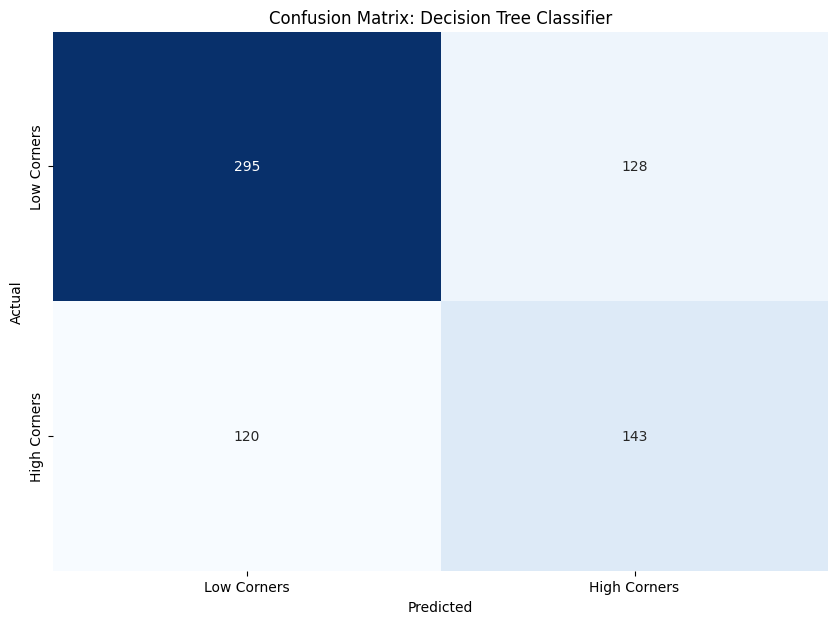

Model: Random Forest
Validation Accuracy: 0.7201
Training Accuracy: 1.0000



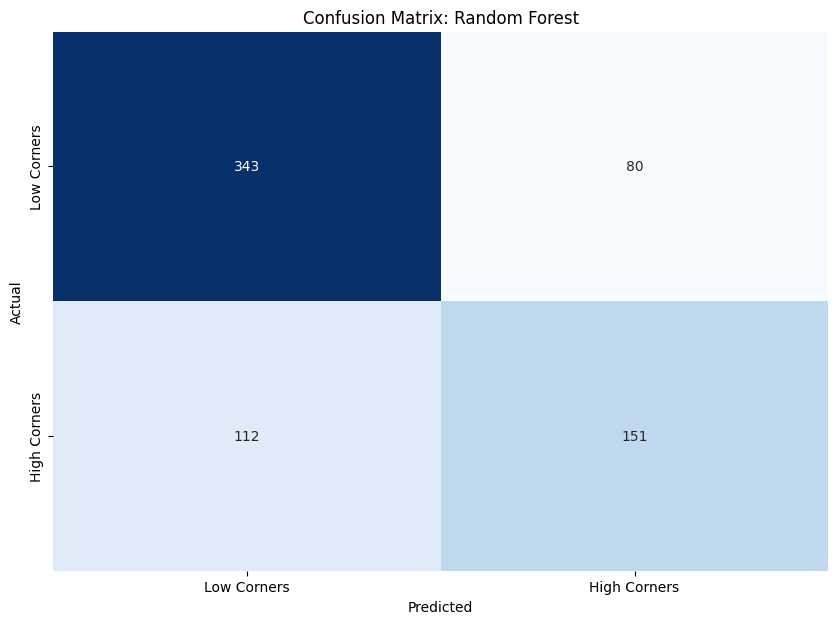

Model: Linear Discriminant Analysis
Validation Accuracy: 0.7274
Training Accuracy: 0.7240



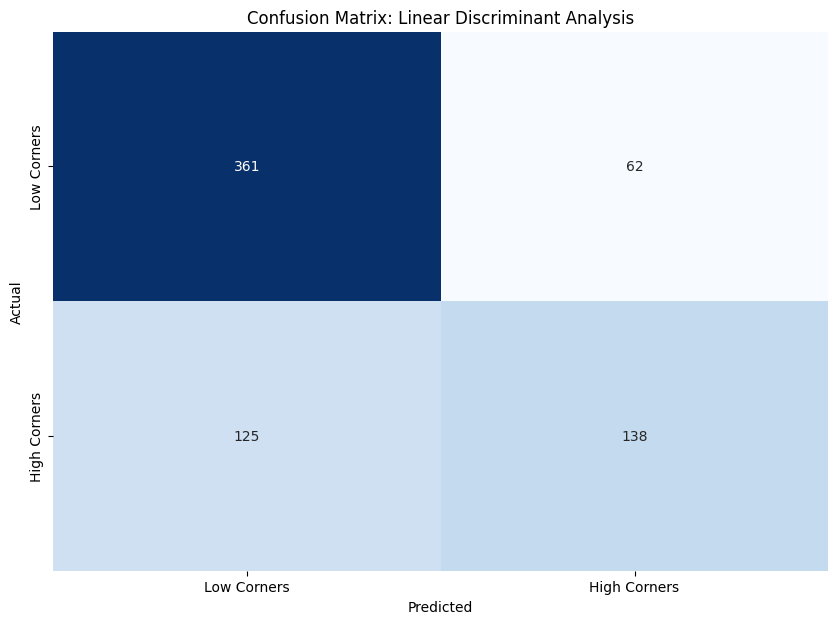

Model: Ada Boost
Validation Accuracy: 0.7041
Training Accuracy: 0.7534



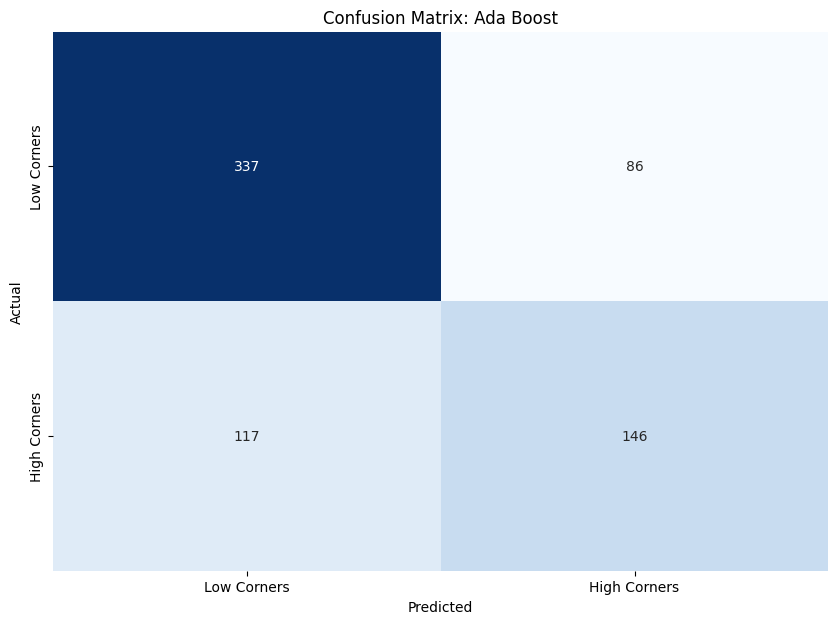

Model: XGBClassifier
Validation Accuracy: 0.6647
Training Accuracy: 1.0000



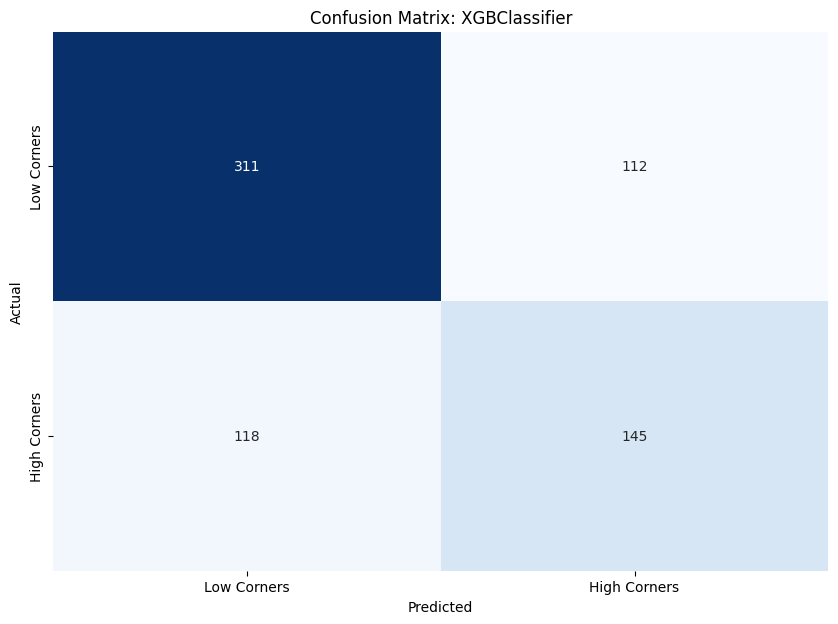

Model: Gradient Boosting
Validation Accuracy: 0.7187
Training Accuracy: 0.8254



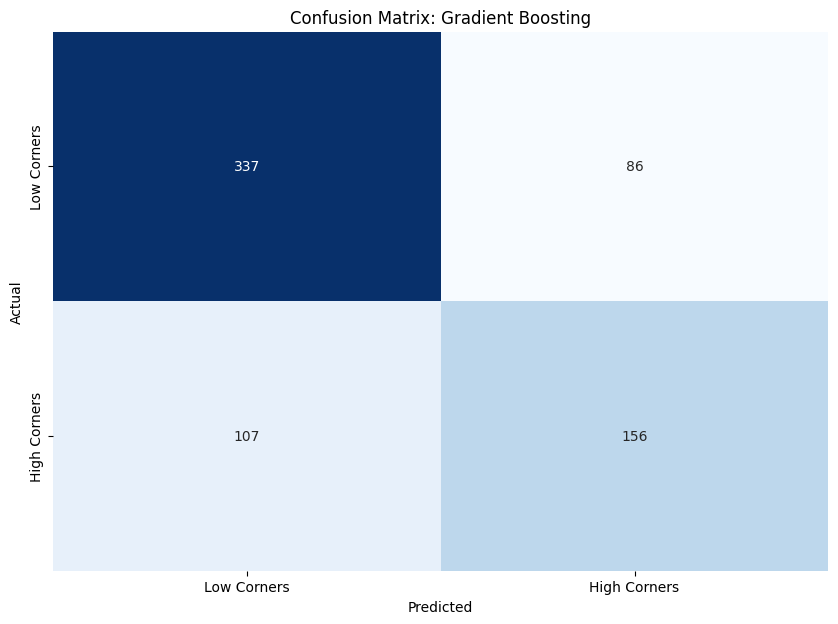

[LightGBM] [Info] Number of positive: 675, number of negative: 923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.422403 -> initscore=-0.312917
[LightGBM] [Info] Start training from score -0.312917
Model: LGBMClassifier
Validation Accuracy: 0.6895
Training Accuracy: 0.9994



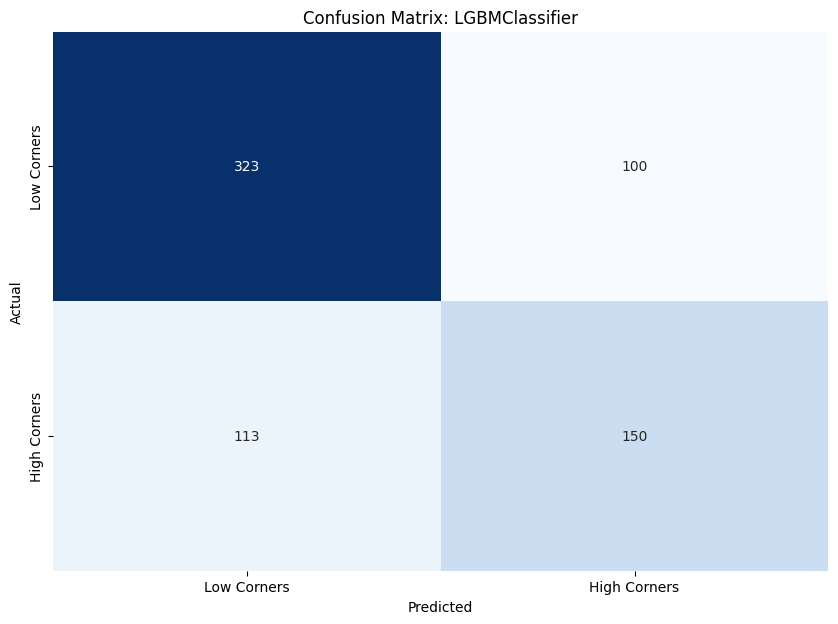

Model Scores Summary:
Logistic Regression: 0.7362
Decision Tree Classifier: 0.6385
Random Forest: 0.7201
Linear Discriminant Analysis: 0.7274
Ada Boost: 0.7041
XGBClassifier: 0.6647
Gradient Boosting: 0.7187
LGBMClassifier: 0.6895


In [ ]:

# Assume X_train, X_test, y_train, y_test are already defined from your data

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Ada Boost', AdaBoostClassifier()),
    ('XGBClassifier', XGBClassifier(eval_metric='mlogloss')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LGBMClassifier', LGBMClassifier())
]

# List to store model scores
models_score = []
# Loop over models
for name, model in models:
    # Fit the model
    model.fit(X_train_imputed, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_imputed)

    # Calculate validation and training accuracies
    val_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_train_imputed))

    # Append model name and validation accuracy to the list
    models_score.append([name, val_accuracy])

    # Print accuracies for the model
    print(f"Model: {name}")
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Training Accuracy: {train_accuracy:.4f}\n')

    # Generate and plot confusion matrix with custom labels
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Optionally, print the summary of model scores
print("Model Scores Summary:")
for name, score in models_score:
    print(f"{name}: {score:.4f}")



# **Ensemble Model combined Rnadom foreset xgb and logistics regression ml model**
\
---



Ensemble Validation Accuracy: 0.7085


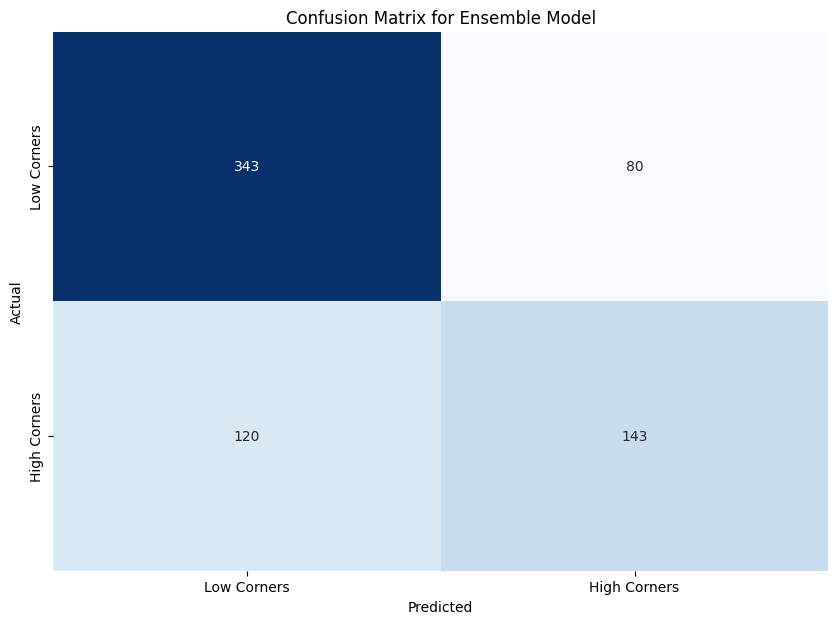

In [ ]:

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define individual models
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
xgboost = XGBClassifier(eval_metric='mlogloss', random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Define the ensemble model using VotingClassifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('XGBoost', xgboost),
    ('Logistic Regression', logistic_regression)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_imputed, y_train)

# Predict on test set
y_pred = ensemble_model.predict(X_test_imputed)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Validation Accuracy: {val_accuracy:.4f}')

# Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Ensemble Model combined Linear Discriminant Analysis and logistics regression ml model**
\

Ensemble Validation Accuracy: 0.7391
Cross-Validation Mean Accuracy: 0.7058

Classification Report:
               precision    recall  f1-score   support

 Low Corners       0.77      0.83      0.80       423
High Corners       0.68      0.60      0.64       263

    accuracy                           0.74       686
   macro avg       0.72      0.71      0.72       686
weighted avg       0.74      0.74      0.74       686



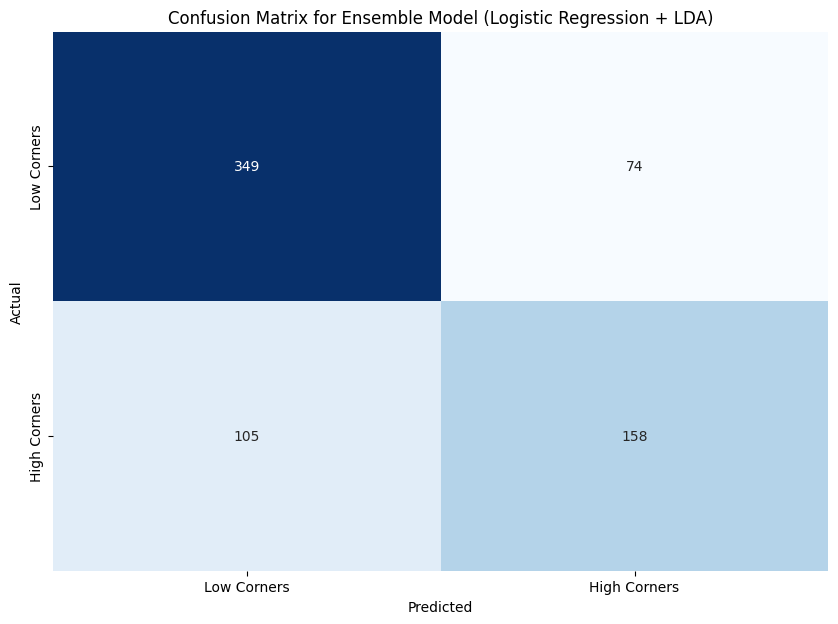

Cross-Validation Scores: [0.696875   0.753125   0.74375    0.67398119 0.66144201]


In [ ]:

# Step 1: Standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize SimpleImputer and handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 3: Define individual models with optimized hyperparameters
logistic_regression = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lda = LinearDiscriminantAnalysis()

# Step 4: Define the ensemble model using VotingClassifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', logistic_regression),
    ('Linear Discriminant Analysis', lda)
], voting='soft')

# Step 5: Use cross-validation to assess the performance of the model
cv_scores = cross_val_score(ensemble_model, X_train_imputed, y_train, cv=5, scoring='accuracy')

# Step 6: Fit the ensemble model on the entire training set
ensemble_model.fit(X_train_imputed, y_train)

# Step 7: Predict on the test set
y_pred = ensemble_model.predict(X_test_imputed)

# Step 8: Calculate accuracy and other metrics
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Validation Accuracy: {val_accuracy:.4f}')
print(f'Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners']))

# Step 9: Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Ensemble Model (Logistic Regression + LDA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Output cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')


# **Check out with different Hyper parameter**

Ensemble Validation Accuracy: 0.7303
Best Logistic Regression Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'saga'}


Classification Report:
               precision    recall  f1-score   support

 Low Corners       0.75      0.85      0.80       423
High Corners       0.69      0.53      0.60       263

    accuracy                           0.73       686
   macro avg       0.72      0.69      0.70       686
weighted avg       0.73      0.73      0.72       686



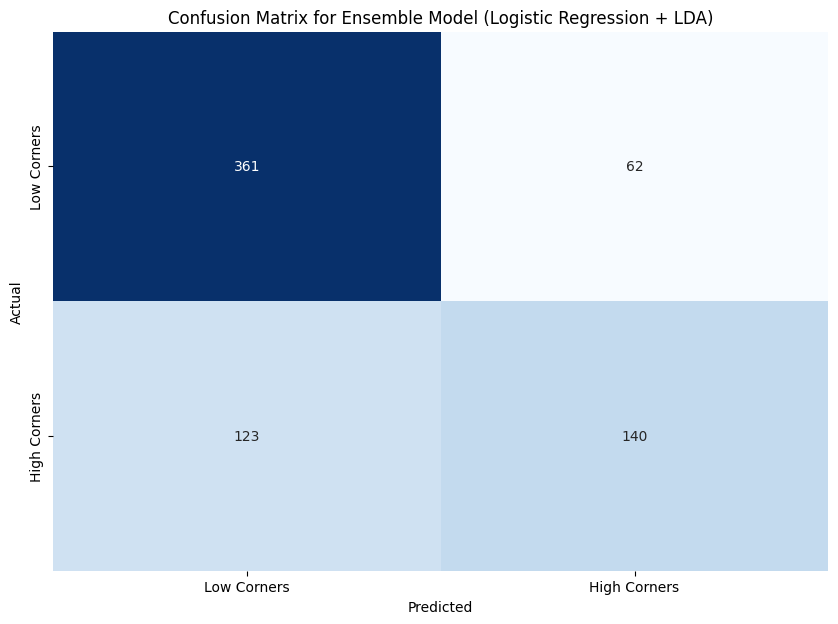

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, y_train, y_test are already defined from your data

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize SimpleImputer and handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 3: Define Logistic Regression with hyperparameters
logistic_regression = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='liblinear',  # 'liblinear' is good for smaller datasets and binary classification
    C=0.5,  # Regularization strength; lower value implies stronger regularization
    penalty='l2'  # L2 regularization (default)
)

# Define Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(solver='svd')

# Step 4: Hyperparameter tuning using GridSearchCV for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 0.5, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Types of regularization
    'solver': ['liblinear', 'saga']  # Solvers for optimization
}

grid_search_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train_imputed, y_train)
best_logistic = grid_search_logistic.best_estimator_

# No need for GridSearchCV for LDA as it's relatively straightforward

# Step 5: Define the ensemble model using VotingClassifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', best_logistic),
    ('Linear Discriminant Analysis', lda)
], voting='soft')

# Step 6: Fit the ensemble model on the training set
ensemble_model.fit(X_train_imputed, y_train)

# Step 7: Predict on the test set
y_pred = ensemble_model.predict(X_test_imputed)

# Step 8: Calculate accuracy and other metrics
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Validation Accuracy: {val_accuracy:.4f}')
print(f'Best Logistic Regression Parameters: {grid_search_logistic.best_params_}\n')

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners']))

# Step 9: Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Ensemble Model (Logistic Regression + LDA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Check out which features is best for this model**

Validation Accuracy: 0.7143

Classification Report:
               precision    recall  f1-score   support

 Low Corners       0.74      0.82      0.78       423
High Corners       0.65      0.54      0.59       263

    accuracy                           0.71       686
   macro avg       0.70      0.68      0.69       686
weighted avg       0.71      0.71      0.71       686



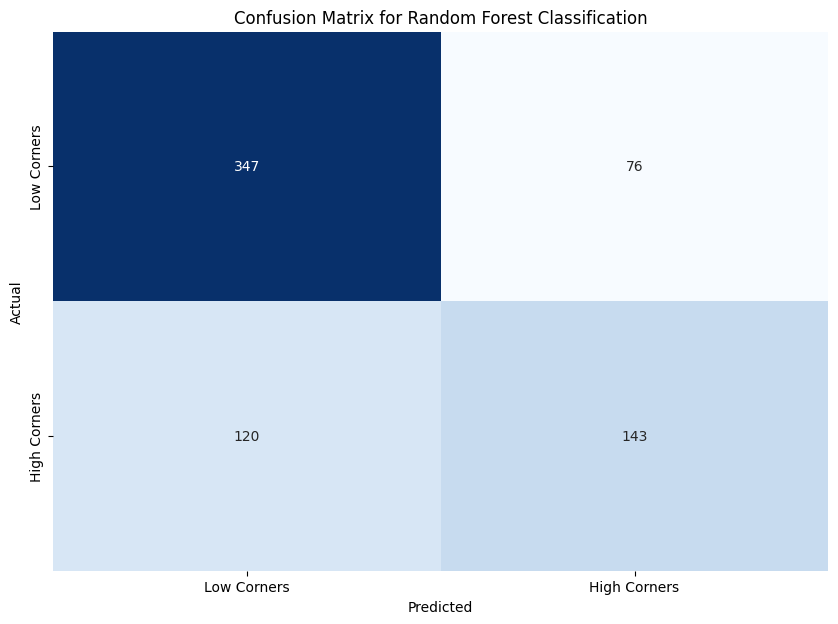

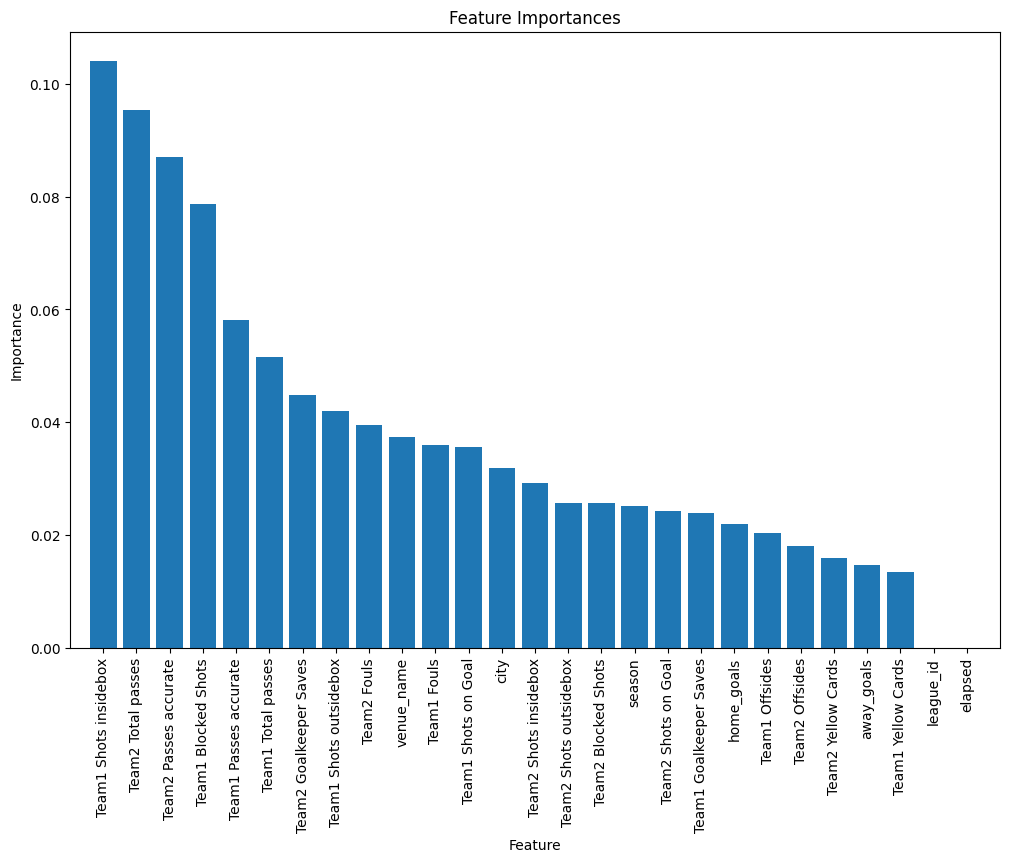

In [ ]:


features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners']))

# Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Random Forest Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


# **[Accuracy improves for best 18 features on Logistic Regression**

Top 18 Features: ['Team2 Total passes' 'Team2 Passes accurate' 'Team1 Shots insidebox'
 'Team1 Total passes' 'home_goals' 'Team1 Blocked Shots' 'Team2 Fouls'
 'Team1 Passes accurate' 'Team1 Shots on Goal' 'Team1 Fouls'
 'Team1 Goalkeeper Saves' 'Team1 Shots outsidebox' 'Team2 Shots on Goal'
 'season' 'venue_name' 'Team2 Shots insidebox' 'city'
 'Team2 Goalkeeper Saves']
Validation Accuracy with Top 18 Features: 0.7659

Classification Report (Top 18 Features):
               precision    recall  f1-score   support

 Low Corners       0.78      0.87      0.82       287
High Corners       0.73      0.59      0.65       170

    accuracy                           0.77       457
   macro avg       0.76      0.73      0.74       457
weighted avg       0.76      0.77      0.76       457



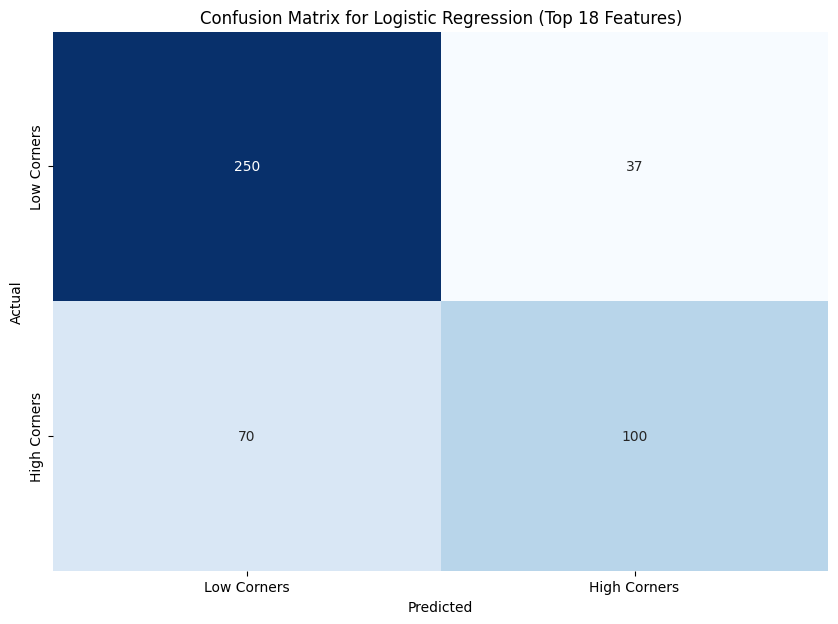

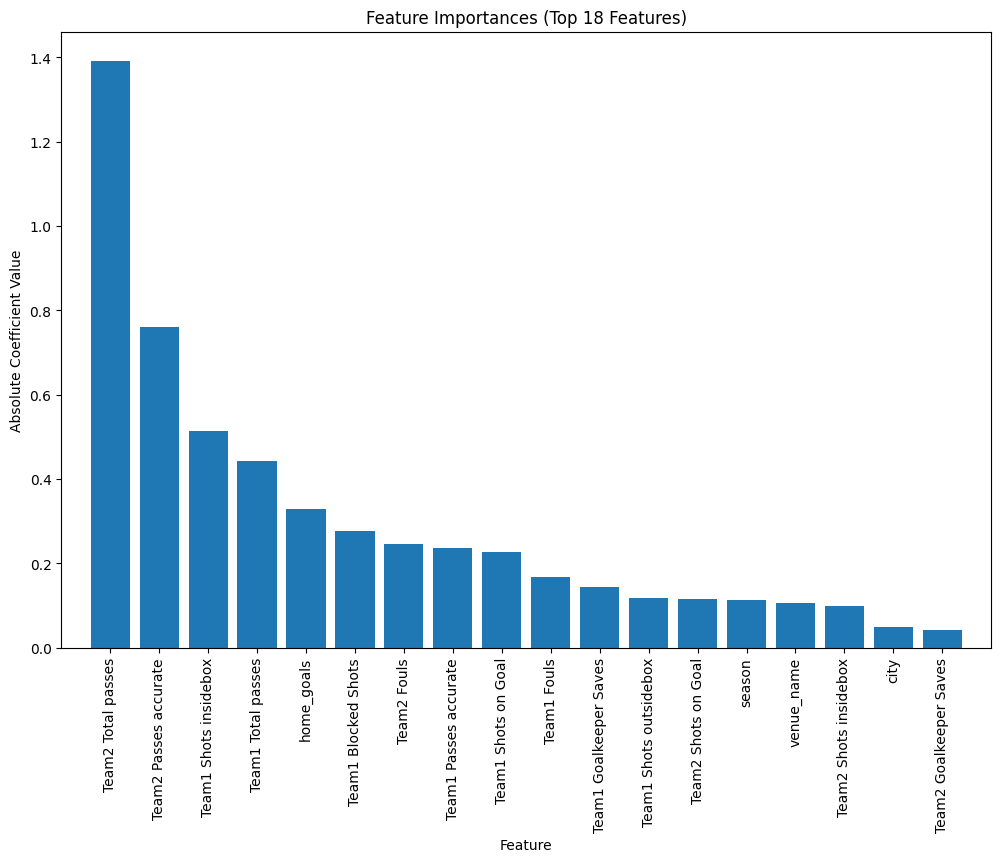

In [ ]:

# Sample data loading (replace with your actual data loading method)
# data = pd.read_csv('your_data.csv')

features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the LogisticRegression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Extract coefficients and identify top 18 features
coefficients = logistic_model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

top_n = 18
top_indices = indices[:top_n]
top_features = np.array(features)[top_indices]

print("Top 18 Features:", top_features)

# Create new feature sets with only the top 18 features
X_train_top = X_train_scaled[:, top_indices]
X_test_top = X_test_scaled[:, top_indices]

# Train and evaluate the Logistic Regression model using only the top 18 features
logistic_model_top = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_top.fit(X_train_top, y_train)

# Predict on the test set with the top features
y_pred_top = logistic_model_top.predict(X_test_top)

# Calculate accuracy
val_accuracy_top = accuracy_score(y_test, y_pred_top)
print(f'Validation Accuracy with Top 18 Features: {val_accuracy_top:.4f}')

# Print classification report
print("\nClassification Report (Top 18 Features):\n", classification_report(y_test, y_pred_top, target_names=['Low Corners', 'High Corners']))

# Generate and plot confusion matrix
cf_matrix_top = confusion_matrix(y_test, y_pred_top)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_top, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Logistic Regression (Top 18 Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importances (in Logistic Regression, this is based on absolute values of coefficients)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Top 18 Features)')
plt.bar(range(top_n), np.abs(coefficients[top_indices]), align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlim([-1, top_n])
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.show()


# **[Accuracy improves for best 18 features on Random forest model**

Top 18 Features: ['Team1 Shots insidebox' 'Team2 Passes accurate' 'Team2 Total passes'
 'Team1 Blocked Shots' 'Team1 Passes accurate' 'Team1 Total passes'
 'Team2 Goalkeeper Saves' 'venue_name' 'Team2 Fouls' 'Team1 Fouls'
 'Team1 Shots outsidebox' 'Team1 Shots on Goal' 'city'
 'Team2 Shots insidebox' 'Team2 Shots outsidebox' 'Team1 Goalkeeper Saves'
 'Team2 Blocked Shots' 'Team2 Shots on Goal']
Validation Accuracy with Top 18 Features: 0.7593

Classification Report (Top 18 Features):
               precision    recall  f1-score   support

 Low Corners       0.78      0.86      0.82       287
High Corners       0.71      0.59      0.65       170

    accuracy                           0.76       457
   macro avg       0.75      0.73      0.73       457
weighted avg       0.76      0.76      0.75       457



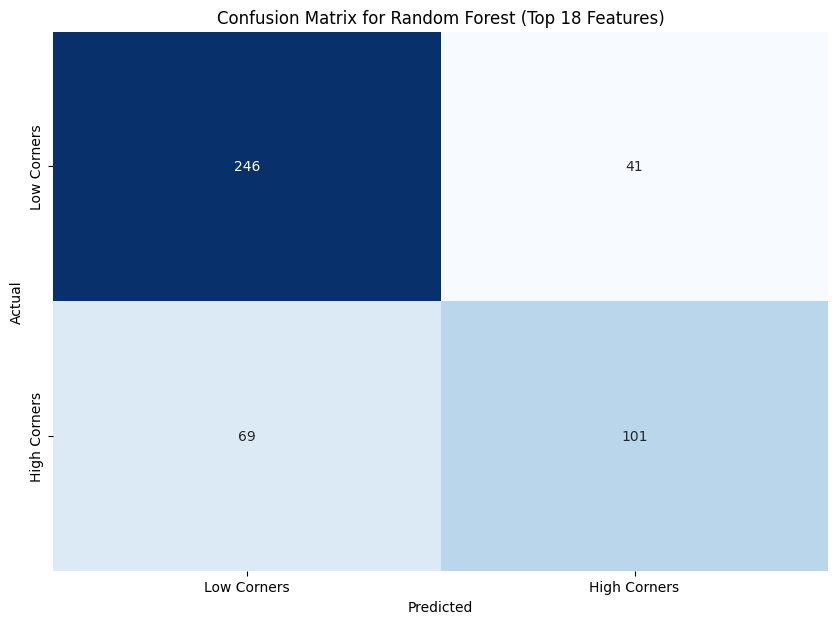

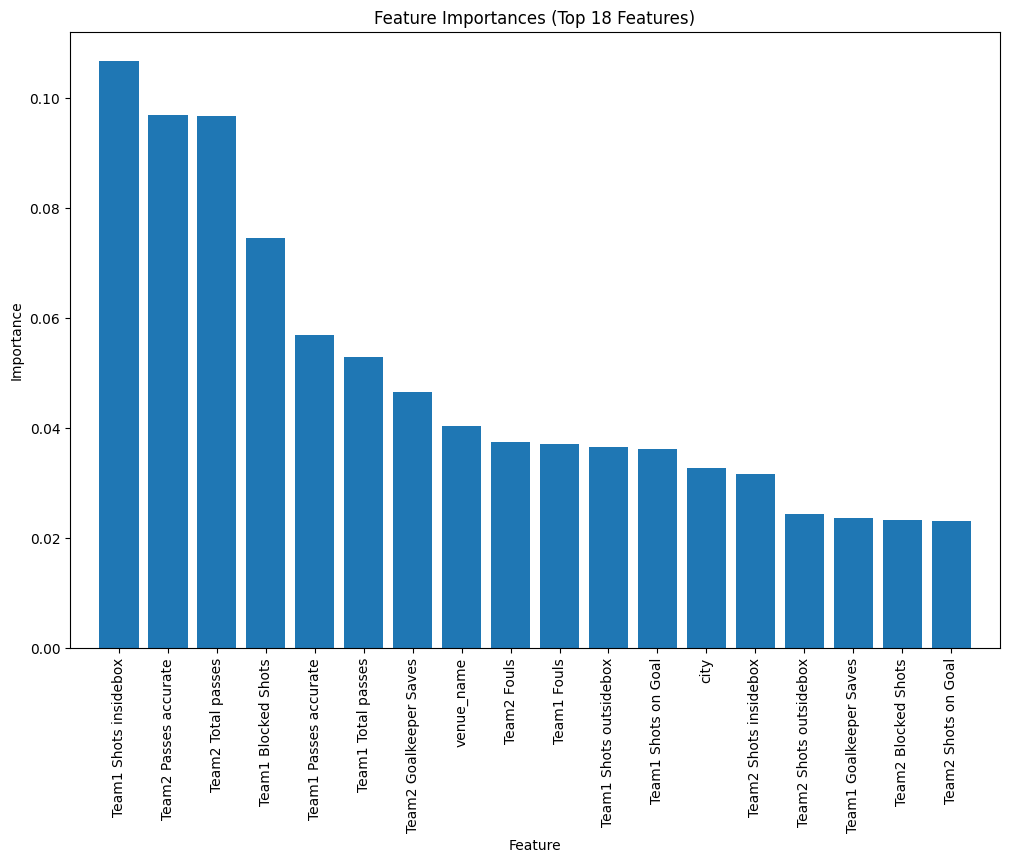

In [ ]:

features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importances and identify top 18 features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 18
top_indices = indices[:top_n]
top_features = np.array(features)[top_indices]

print("Top 18 Features:", top_features)

# Create new feature sets with only the top 18 features
X_train_top = X_train_scaled[:, top_indices]
X_test_top = X_test_scaled[:, top_indices]

# Train and evaluate the Random Forest model using only the top 18 features
rf_model_top = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model_top.fit(X_train_top, y_train)

# Predict on the test set with the top features
y_pred_top = rf_model_top.predict(X_test_top)

# Calculate accuracy
val_accuracy_top = accuracy_score(y_test, y_pred_top)
print(f'Validation Accuracy with Top 18 Features: {val_accuracy_top:.4f}')

# Print classification report
print("\nClassification Report (Top 18 Features):\n", classification_report(y_test, y_pred_top, target_names=['Low Corners', 'High Corners']))

# Generate and plot confusion matrix
cf_matrix_top = confusion_matrix(y_test, y_pred_top)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix_top, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Random Forest (Top 18 Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Top 18 Features)')
plt.bar(range(top_n), importances[top_indices], align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlim([-1, top_n])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



##  **Check out using different Hyper *parameter**

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

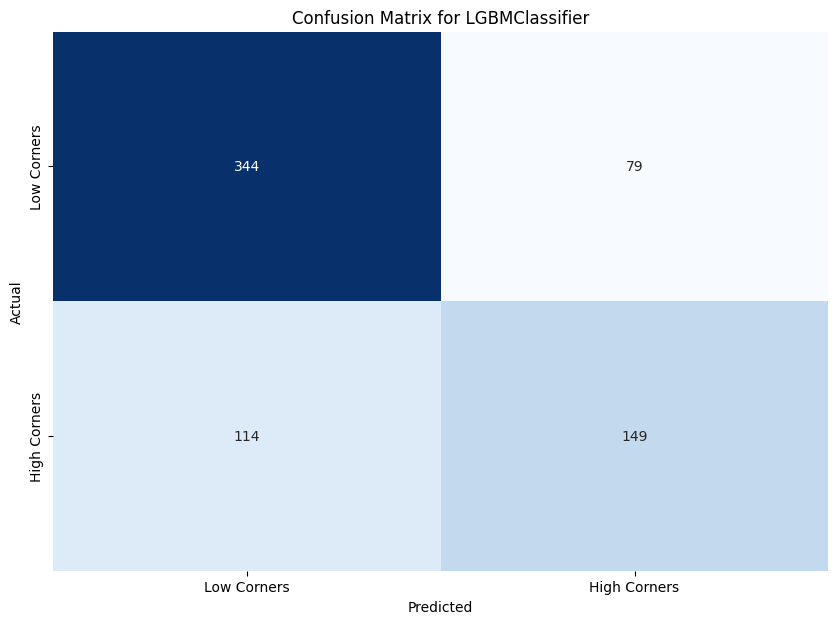

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

# Assume X and y are your feature matrix and target vector

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize SimpleImputer and handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Define LGBMClassifier with hyperparameters
lgbm_model = LGBMClassifier(
    random_state=42,
    boosting_type='gbdt',  # Gradient Boosting Decision Tree (default)
    objective='binary',  # Binary classification
    metric='binary_error'  # Metric for binary classification error
)

# Step 5: Hyperparameter tuning using GridSearchCV
param_grid_lgbm = {
    'num_leaves': [31, 63, 127],  # Number of leaves in one tree
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'boosting_type': ['gbdt', 'dart'],  # Boosting type
    'objective': ['binary']
}

grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_train_imputed, y_train)
best_lgbm = grid_search_lgbm.best_estimator_

# Step 6: Fit the best LGBMClassifier model on the training set
best_lgbm.fit(X_train_imputed, y_train)

# Step 7: Predict on the test set
y_pred = best_lgbm.predict(X_test_imputed)

# Step 8: Calculate accuracy and other metrics
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Best LGBMClassifier Validation Accuracy: {val_accuracy:.4f}')
print(f'Best LGBMClassifier Parameters: {grid_search_lgbm.best_params_}\n')

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners']))

# Step 9: Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for LGBMClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Check out with CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models

# Sample data loading (replace with your actual data loading method)
# data = pd.read_csv('your_data.csv')

# Determine if the match had high or low corners
data['high_corners'] = data['Team1 Corner Kicks'].apply(lambda x: 1 if x > 5 else 0)  # Example threshold

features = [
    'home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
    'Team1 Fouls', 'Team2 Fouls',
    'Team1 Blocked Shots', 'Team2 Blocked Shots',
    'Team1 Shots insidebox', 'Team2 Shots insidebox',
    'Team1 Shots outsidebox', 'Team2 Shots outsidebox',
    'Team1 Offsides', 'Team2 Offsides',
    'Team1 Yellow Cards', 'Team2 Yellow Cards',
    'Team1 Goalkeeper Saves', 'Team2 Goalkeeper Saves',
    'Team1 Total passes', 'Team2 Total passes',
    'Team1 Passes accurate', 'Team2 Passes accurate',
    'venue_name', 'city', 'league_id', 'season', 'elapsed'
]

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the neural network model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(512, activation='relu'),             # Hidden layer with 512 units and ReLU activation
    layers.Dense(256, activation='relu'),             # Additional hidden layer with 256 units and ReLU activation
    layers.Dense(1, activation='sigmoid')             # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', test_accuracy)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,921 (570.00 KB)

 Trainable params: 145,921 (570.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6615 - loss: 0.6097 - val_accuracy: 0.6969 - val_loss: 0.5692
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7488 - loss: 0.5014 - val_accuracy: 0.6938 - val_loss: 0.5833
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7563 - loss: 0.4989 - val_accuracy: 0.7000 - val_loss: 0.5781
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7651 - loss: 0.4724 - val_accuracy: 0.7031 - val_loss: 0.5832
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7990 - loss: 0.4493 - val_accuracy: 0.6875 - val_loss: 0.6144
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8274 - loss: 0.4112 - val_accuracy: 0.6750 - val_loss: 0.6285
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - loss: 0.3804 - val_accuracy: 0.6750 - val_loss: 0.6593
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8343 - loss: 0.3797 - val_accuracy: 0.6938 - val_loss

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models

# Sample data loading (replace with your actual data loading method)
# data = pd.read_csv('your_data.csv')

# Determine if the match had high or low corners
data['high_corners'] = data['Team1 Corner Kicks'].apply(lambda x: 1 if x > 5 else 0)  # Example threshold

# Define features and target
features = ['home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
             'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls']

X = data[features]
y = data['high_corners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the neural network model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(512, activation='relu'),             # Hidden layer with 512 units and ReLU activation
    layers.Dense(256, activation='relu'),             # Additional hidden layer with 256 units and ReLU activation
    layers.Dense(1, activation='sigmoid')             # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', test_accuracy)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,193 (532.00 KB)

 Trainable params: 136,193 (532.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8683 - loss: 0.3915 - val_accuracy: 0.9906 - val_loss: 0.0782
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9983 - loss: 0.0462 - val_accuracy: 0.9969 - val_loss: 0.0281
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.5415e-04 - val_accuracy: 1.0000 - v

# **Check out specific features on Random forest model**

Validation Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

 Low Corners       1.00      1.00      1.00       423
High Corners       1.00      1.00      1.00       263

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686



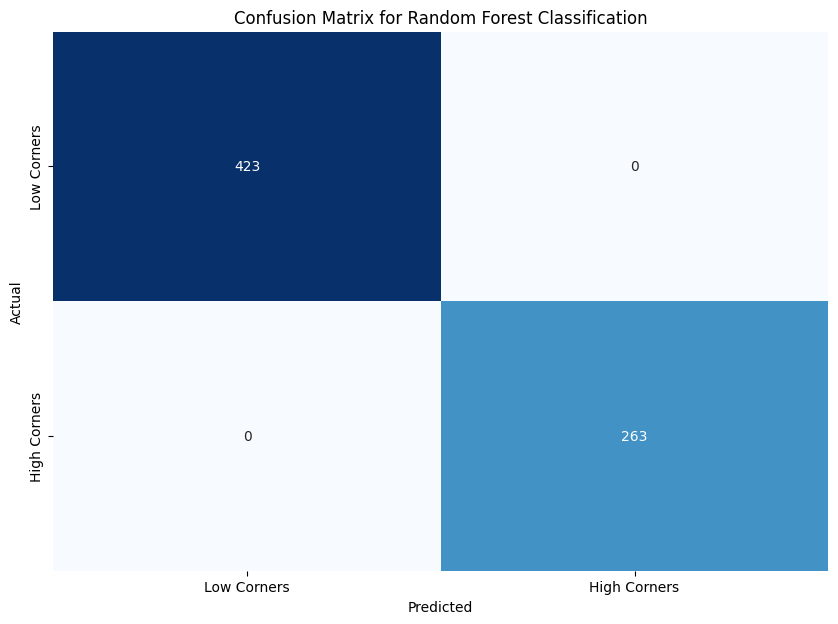

In [ ]:


# Sample data loading (replace with your actual data loading method)
# data = pd.read_csv('your_data.csv')

# Example feature and target variable preparation
features = ['home_goals', 'away_goals', 'Team1 Shots on Goal', 'Team2 Shots on Goal',
             'Team1 Corner Kicks', 'Team2 Corner Kicks', 'Team1 Fouls', 'Team2 Fouls']  # Add relevant features

X = data[features]

# Example target variable preparation (e.g., binary classification for corner kicks)
data['high_corners'] = data.apply(lambda row: 1 if row['Team1 Corner Kicks'] > 5 else 0, axis=1)
y = data['high_corners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Corners', 'High Corners']))

# Generate and plot confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Low Corners', 'High Corners'], yticklabels=['Low Corners', 'High Corners'])
plt.title('Confusion Matrix for Random Forest Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
